# Contexto:
Este conjunto de dados contém 13 características clinicopatológicas correlacionadas com câncer de tireoide. O conjunto de dados foi coletado com duração de 15 anos e cada paciente foi acompanhado por pelo menos 10 anos.

# Fonte:
Esse conjunto de dados foi retirado do <a href="http://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence">UCI Machine Learning Repository.</a>

# Objetivo:

- Explorar o conjunto de dados, extrair insights dos dados e usar evidências estatísticas para testar hipóteses 

### Questões a serem respondidas segmentadas por categoria: 


#### Perfil Demográfico e Histórico dos Pacientes:
<ul>
    <li>Qual é a distribuição etária dos pacientes com câncer de tireoide?</li>
    <li>Existe uma predominância de câncer de tireoide entre homens ou mulheres?</li>
    <li>Qual a relação entre o histórico de tabagismo e a ocorrência de câncer de tireoide?</li>
    </ul>

#### Relação entre Tratamento e Resultados:
<ul>
    <li>Pacientes com histórico de radioterapia têm uma taxa de resposta ao tratamento diferente?</li>
    <li>Qual é a taxa de recorrência do câncer de tireoide e está relacionada ao histórico de tabagismo ou radioterapia?</li>
</ul>

####  Características do Câncer:
<ul>
    <li>Quais tipos de câncer de tireoide são mais comuns segundo a patologia?</li>
</ul>

#### Avaliação de Risco e Estágio:
<ul>
    <li>Como os diferentes estágios do câncer se distribuem entre os pacientes?</li>
    <li>Existe uma relação entre a categoria de risco e a resposta ao tratamento?</li>
</ul>

### As hipóteses a serem testadas são:

- Há uma relação significativa entre a faixa etária e resposta ao tratamento ?

- As idades no grupo que teve recorrência do câncer são significativamente maiores que as do grupo que não teve?

- Há uma relação significativa entre tabagismo e recorrência do câncer 

- As idades nos grupos de risco mais altos tendem a ser maiores do que nos grupos de riscos mais baixos?

- Há uma relação significativa entre a adenopatia e o risco do câncer?


# Entendendo Features:
<br>

<strong>Age:</strong> A idade do paciente no momento do diagnóstico ou tratamento.

<strong>Gender:</strong> O gênero do paciente (masculino ou feminino).

<strong>Smoking:</strong> se o paciente é fumante ou não.

<strong>Hx Smoking:</strong> histórico de tabagismo do paciente (por exemplo, se ele já fumou).

<strong>Hx Radiothreapy:</strong> História de tratamento radioterápico para qualquer condição.

<strong>Thyroid Function:</strong> O estado da função da tireóide, possivelmente indicando se há alguma anormalidade.

<strong>Physical Examination:</strong> Achados de um exame físico do paciente, que pode incluir a palpação da glândula tireóide e estruturas adjacentes.

<strong>Adenopathy:</strong> Presença ou ausência de linfonodos aumentados (adenopatia) na região do pescoço.

<strong>Pathology:</strong> Tipos específicos de câncer de tireoide determinados por exame anatomopatológico de amostras de biópsia.

<strong>Focality:</strong> Se o câncer é unifocal (limitado a um local) ou multifocal (presente em vários locais).

<strong>Risk:</strong> A categoria de risco do câncer com base em vários fatores, como tamanho do tumor, extensão da disseminação e tipo histológico.

<strong>T:</strong> Classificação do tumor com base no tamanho e extensão da invasão em estruturas próximas.

<strong>N:</strong> Classificação nodal indicando envolvimento de linfonodos.

<strong>M:</strong> Classificação de metástases indicando presença ou ausência de metástases à distância.

<strong>Stage</strong>: O estágio geral do câncer, normalmente determinado pela combinação das classificações T, N e M.

<strong>Response</strong>: Resposta ao tratamento, indicando se o câncer respondeu positiva, negativamente ou permaneceu estável após o tratamento.

<strong>Recorrente:</strong> Indica se o câncer recorreu após o tratamento inicial.

# Importando bibliotecas

In [1]:
# Bibliotecas para visualização e manipulação de dados
from math import ceil
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal
import scikit_posthocs as sp

# Código para ativar a conversão entre pandas e R (necessário para testes de hipótese)
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import rpy2.robjects.packages as rpackages

# Selecionar o espelho CRAN e instalar o pacote "Exact"
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages("Exact")

# Importar o pacote "Exact" do R
exact = rpackages.importr("Exact")

# Removendo warnings
import warnings
warnings.filterwarnings("ignore")

# Definindo um estilo para os gráficos
mpl.style.use("ggplot")

mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["xtick.color"] = "black"
mpl.rcParams["ytick.color"] = "black"
mpl.rcParams["grid.color"] = "lightgray"
mpl.rcParams["figure.dpi"] = 180
mpl.rcParams["axes.grid"] = True
mpl.rcParams["font.size"] = 12

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/Exact_3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 46201 bytes (45 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

# Importando função para exibir porcentagens nos gráficos

In [2]:
def set_annotate(fig, h=False, porcentages=False):
    """
    Adiciona anotações aos retângulos em um gráfico de barras.

    Args:
        fig (matplotlib.figure.Figure): Objeto figura matplotlib.
        h (bool): Se verdadeiro, a anotação será horizontal; caso contrário, será vertical.
        porcentages (bool): Se verdadeiro, os valores serão exibidos como porcentagens; caso contrário, como valores brutos.
    """
    for ax in fig.get_axes():
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            if width > 0 and height > 0:
                if h:
                    reference = width 
                    xy = (p.get_x() + width, p.get_y() + height / 2)
                    ha="left"
                    va="center"
                else:
                    reference =  height
                    xy = (p.get_x() + width / 2, p.get_y() + height)
                    ha="center"
                    va="bottom"
                if reference < 0.01:
                    text = "{:.2e}".format(reference)
                else:
                    text = "{:.2f}%".format(reference * 100) if porcentages else "{:.2f}".format(reference)
                
                ax.annotate(text, xy=xy, ha=ha, va=va, fontsize=12, color="black", xytext=(5, 0),
                            textcoords="offset points")

# Lendo, entendendo e limpando o dataset

In [3]:
# Lendo dataset 
df_path = "./Thyroid_Diff.csv"
tireoide = pd.read_csv(df_path)

In [4]:
tireoide.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
# Checando os tipos de dados das features, campos nulos, e memória do dataset
tireoide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

##### Observações: 

<ul>
    <li>Nenhum campo possui dados nulos</li>
    <li>Temos 383 linhas e 17 colunas nesse dataframe</li>
    <li>Existem 16 variáveis categóricas e apenas uma variável(idade) numérica</li>
    <li>O dataframe não ocupa muito espaço na memória</li>
</ul>

In [6]:
tireoide.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

Apenas verificando novamente que não há dados nulos

In [7]:
# Verificando valores únicos 
tireoide.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [8]:
# Descrição estatística da idade
tireoide.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


##### Observações: 
<ul> 
    <li>O desvio padrão é alto, mostra que as idades dos pacientes estão mais dispersas em relação a media</li>  
    <li>A média nesse contexto é maior do que a mediana, isso indica que a distribuição é assimétria a direita</li>   
</ul>

In [9]:
# Descrição estatística das variáveis categóricas
tireoide.describe(include="O").T

,count,unique,top,freq
Gender,383,2,F,312
Smoking,383,2,No,334
Hx Smoking,383,2,No,355
Hx Radiothreapy,383,2,No,376
Thyroid Function,383,5,Euthyroid,332
Physical Examination,383,5,Multinodular goiter,140
Adenopathy,383,6,No,277
Pathology,383,4,Papillary,287
Focality,383,2,Uni-Focal,247
Risk,383,3,Low,249


In [10]:
# Contagem de elementos para variáveis categóricas
for variavel_categorica in tireoide.drop("Age", axis=1).columns.tolist():
    print("=-"*30)
    print(tireoide[variavel_categorica].value_counts())

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Gender
F    312
M     71
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Smoking
No     334
Yes     49
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Hx Smoking
No     355
Yes     28
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter           

 Me parece que há algo estranho aqui. O número de "Hx Smoking" positivos, ou seja, pessoas que já fumaram, é inferior ao número de "Smoking" positivios, ou seja, pessoas que são fumantes. Vamos checar a interseção contraditória para verificar a quantidade de observações que as contém.

In [11]:
print(f"Número de pacientes fumantes: {tireoide[tireoide['Smoking'] == 'Yes'].shape[0]}")
print(f"Número de pacientes que já fumaram: {tireoide[tireoide['Hx Smoking'] == 'Yes'].shape[0]}")
print(f"Número de pacientes que 'fumaram e fumam': {tireoide[(tireoide['Hx Smoking'] == 'Yes') & (tireoide['Smoking'] == 'Yes')].shape[0]}")

Número de pacientes fumantes: 49
Número de pacientes que já fumaram: 28
Número de pacientes que 'fumaram e fumam': 12


Há quatro possíveis combinacões entre essas featues:

Hx Smoking = Yes, Smoking = Yes: O paciente tem um histórico de tabagismo e ainda fuma atualmente. Me parece uma combinação razoável
Hx Smoking = Yes, Smoking = No: O paciente tem um histórico de tabagismo, mas não fuma mais. Me parece uma combinação razoável
Hx Smoking = No, Smoking = No: O paciente nunca fumou. Me parece uma combinação razoável
Hx Smoking = No, Smoking = Yes: Essa combinação me parece contraditória, pois seria impossível alguém ser um atual fumante sem ter um histórico de tabagismo. 

Num ambiente de trabalho, o ideal seria revisar os dados e suas definições com os responsáveis para garantir que não houve erros. 

Como no contexto desse projeto pessoal não há essa possibilidade, irei remover aqueles que fazem parte da interseção estranha dessas características

In [12]:
intersecao_a_remover = tireoide[(tireoide['Hx Smoking'] == 'No') & (tireoide['Smoking'] == 'Yes')]

print(f"Temos então, {intersecao_a_remover.shape[0]} observações dessa interseção a remover.")

Temos então, 37 observações dessa interseção a remover.


In [13]:
# Removendo observações e reajustando o index do dataframe 
tireoide = tireoide.drop(intersecao_a_remover.index, axis=0).reset_index(drop=True)

In [14]:
tireoide.shape

(346, 17)

# Análise Exploratória

## Análise Univariada

Para melhoria da visualização, decidi segmentar a plotagem de variáveis em categorias

<ol>
<li>Demografia:
    <ul>
        <li>Age</li>
        <li>Gender</li>
    </ul></li>
    
<br>
    
<li> Histórico de Tabagismo:
    <ul>
        <li>Smoking</li>
        <li>Hx Smoking</li>
    </ul></li>

<br>
    
<li> Avaliações Clínicas:
    <ul>
        <li>Hx Radiotherapy</li>
        <li>Thyroid Function</li>
        <li>Physical Examination</li>
        <li>Adenopathy</li>
    </ul></li>

<br>
    
<li> Resultados Patológicos:
    <ul>
        <li>Pathology</li>
        <li>Focality</li>
        <li>Risk</li>
        <li>T</li>
        <li>N</li>
        <li>M</li>
        <li>Stage</li>
    </ul></li>
    
<br>
    
<li> Resultados do Tratamento:
    <ul>
        <li>Response</li>
        <li>Recurred</li>
    </ul></li>
</ol>

### Demografia

#### Visualizando distribuição geral das idades

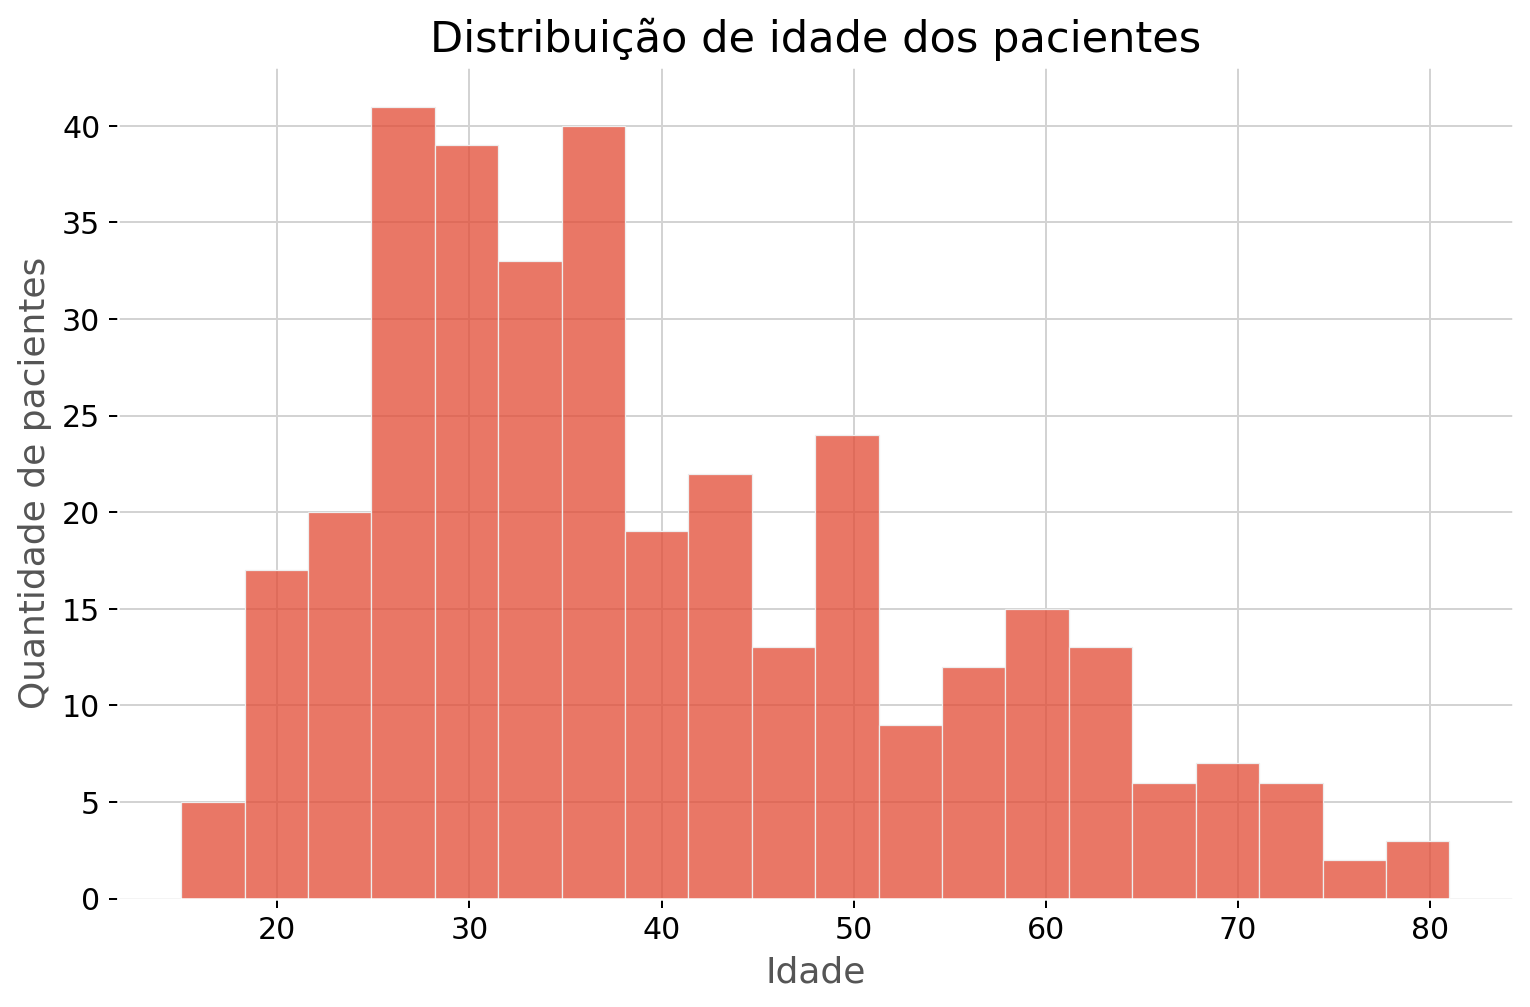

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=tireoide, x="Age", bins=20, ax=ax)


plt.title("Distribuição de idade dos pacientes")
ax.set_xlabel("Idade")
ax.set_ylabel("Quantidade de pacientes")



plt.show()

##### Observações:
<ul><li>Me parece que na amostra há uma quantidade maior de pessoas com idades entre os 20 e pouco mais de 30 anos, especialmente com idades próximas aos 30. </li></ul>



Nessa análise, optarei por dividir as idades em intervalos, para se obter uma análise mais abrangente. Nesse caso, acho interessante aplicar a fórmula de Sturges para segmentar as idades em intervalos coerentes. Que é dada por:  


<img src="https://maestrovirtuale.com/wp-content/uploads/2019/10/Regla-de-Sturges-10.png" width="350">

mas para isso, preciso checar a normalidade da distribuição de idades com o Teste Kolmogorov-Smirnov, que é um teste que compara a distribuição analisada a uma normal teórica. 

<strong>HIPÓTESES DO TESTE KS:</strong> 
<br>

H0: A distribuição dos dados segue uma distribuição teórica especificada(nesse caso uma normal) 
<br>
H1: A distribuição dos dados não segue a distribuição teórica especificada. 
<br>


Nesse caso, vou definir α = 0.05

In [16]:
idades = tireoide.Age

a = 0.05
teste_ks = stats.kstest(idades, "norm", args=(np.mean(idades), np.std(idades)))

print("Teste Kolmogorov-Smirnov:")
print(f"Estatística D = {teste_ks.statistic}, p-valor = {teste_ks.pvalue}")

if teste_ks.pvalue < 0.05:
    print("A distribuição não segue uma normal")
else:
    print("A distribuição segue uma normal")

Teste Kolmogorov-Smirnov:
Estatística D = 0.11316257995303441, p-valor = 0.00025767121746097886
A distribuição não segue uma normal


Dessa forma, optarei por segmentar manualmente, por intervalos de 10 em 10 até os 64 anos, e em uma faixa de 20 após ele

In [17]:
# Verificando idade mínima 
tireoide.Age.min()

15

In [18]:
bins = [15, 25, 35, 45, 55, 65, 85]

In [19]:
tireoide["Age_bin"] = pd.cut(tireoide["Age"], bins=bins, right=False)
tireoide.Age_bin.value_counts()

Age_bin
[25, 35)    113
[35, 45)     81
[45, 55)     46
[15, 25)     42
[55, 65)     40
[65, 85)     24
Name: count, dtype: int64

Fiz o teste com outros cortes e essa abordagem promoveu o melhor resultado. Abaixo de 10, as faixas mais avançadas ficam com bem menos observações. Já acima de 10, os dados ficam agrupados até demais, impossibilitando uma análise mais eficiente 

#### Visualizando distribuição das idade por intervalos

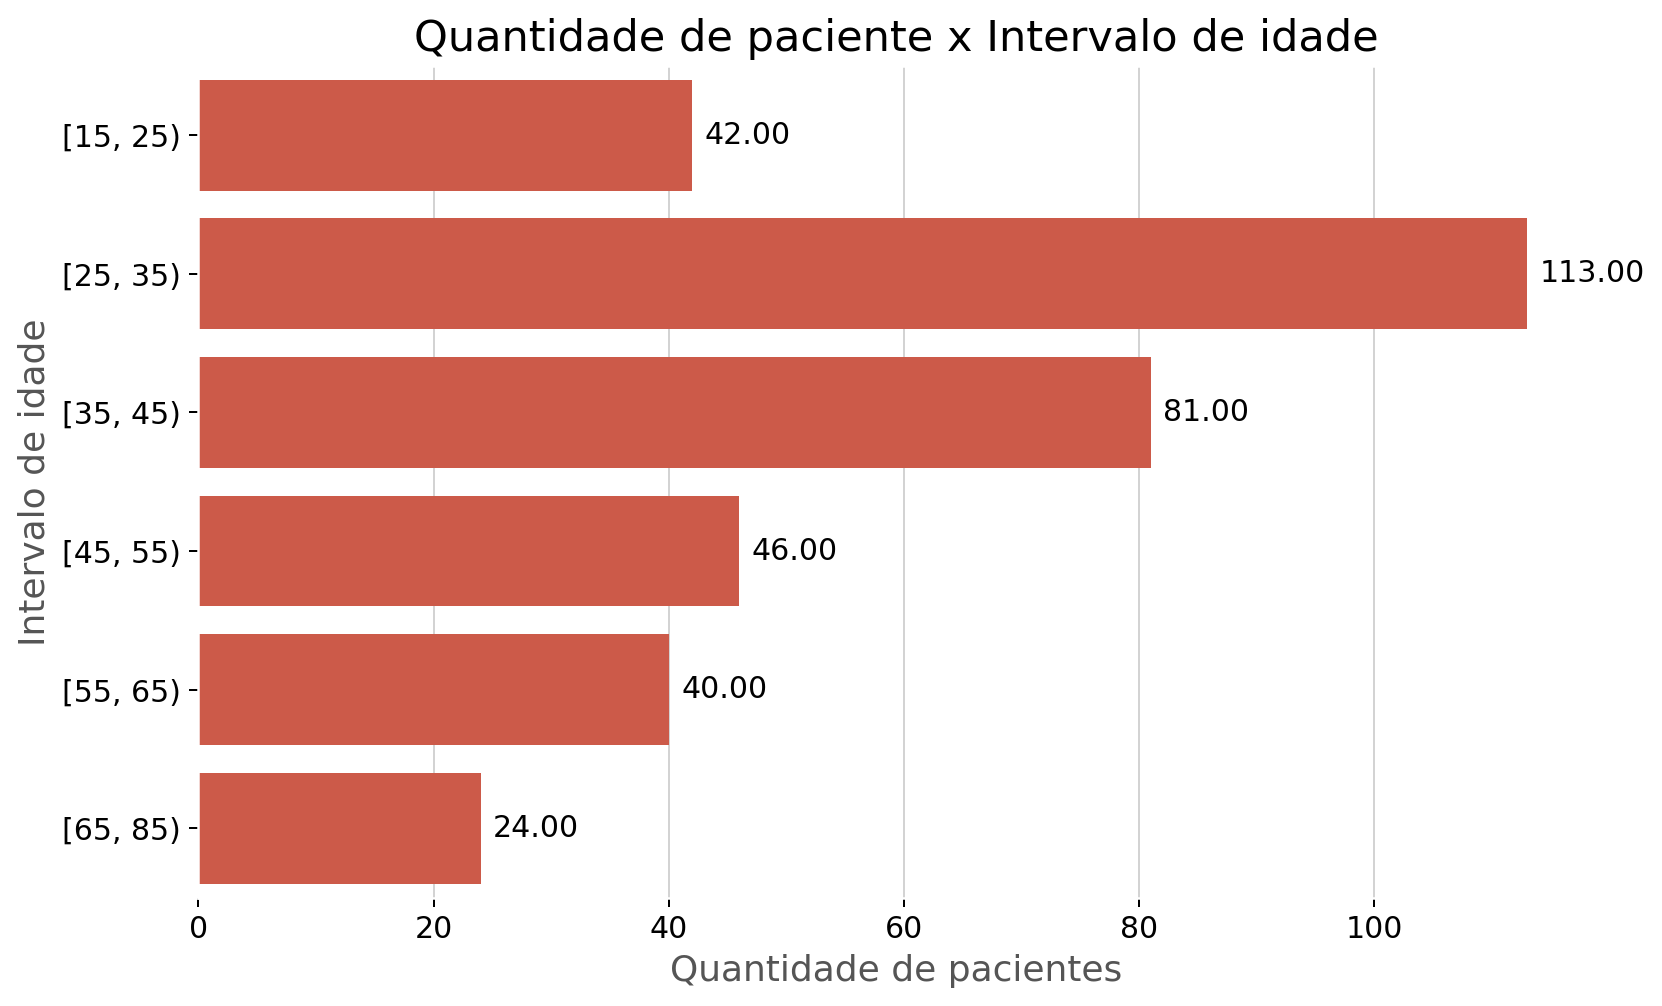

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(data=tireoide, y="Age_bin")

ax.set_xlabel("Quantidade de pacientes")
ax.set_ylabel("Intervalo de idade")

plt.title("Quantidade de paciente x Intervalo de idade")
set_annotate(fig, h=True)

plt.show()

##### Observações:
<ul> 
    <li>Novamente, é possível notar que o grupo de pessoas com idade entre 22 e 44 anos é bem maior na amostra, com um destaque especial ao intervalo entre 25 e 35</li>
    
</ul>

#### Visualizando distribuição do sexo dos pacientes

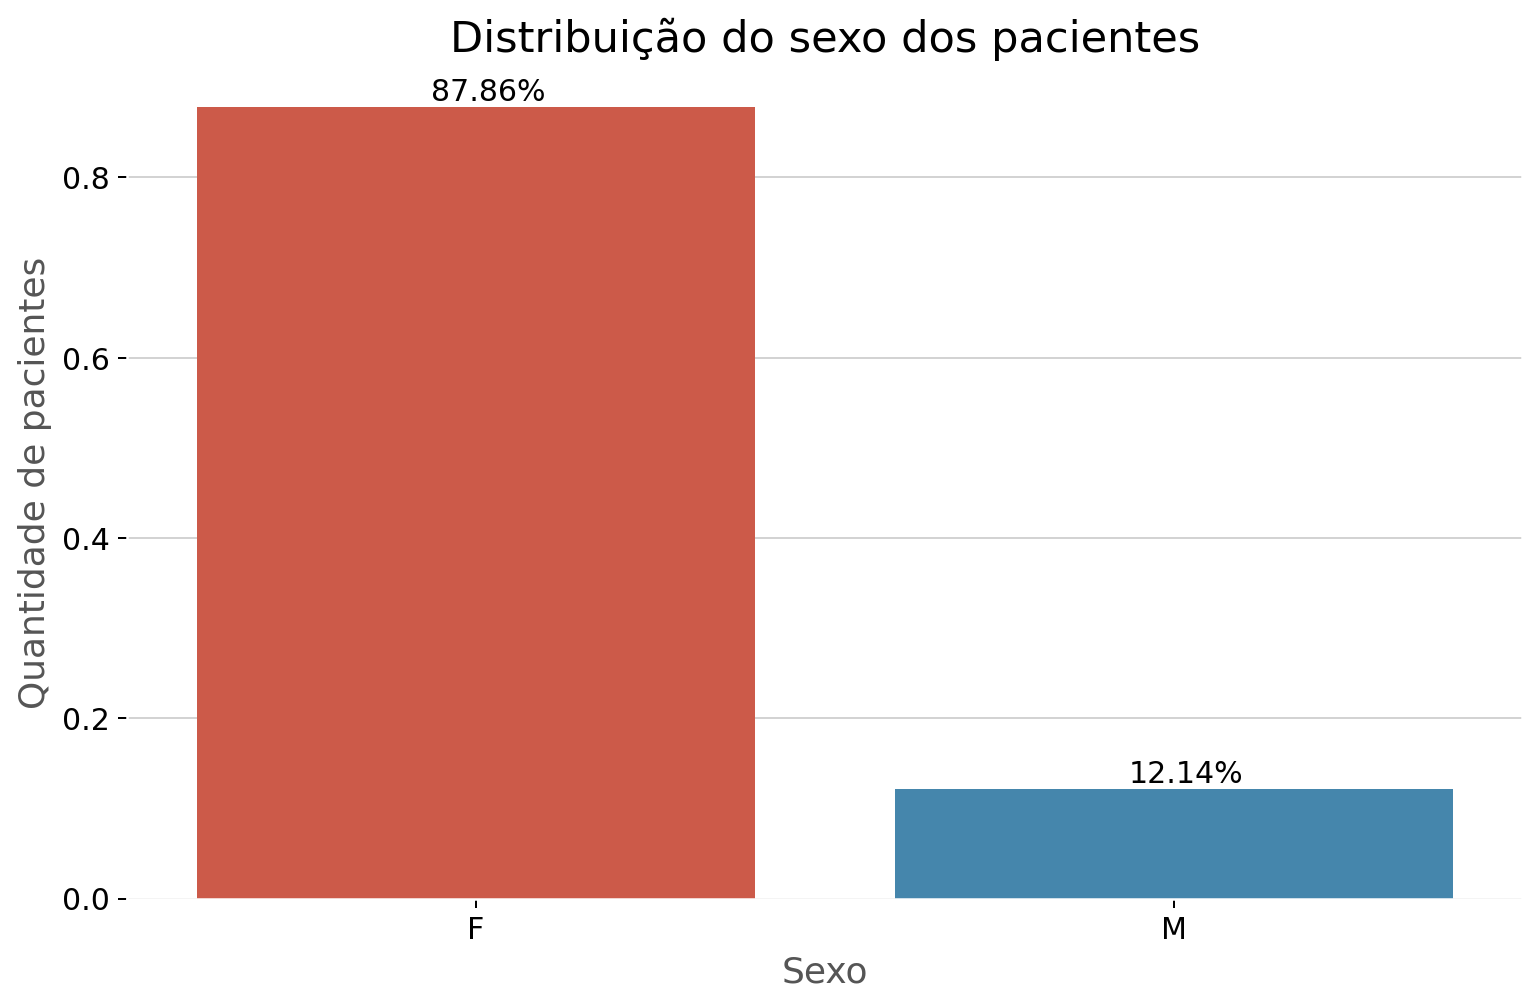

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

proporcao_sexos = tireoide.Gender.value_counts(normalize=True).reset_index()

sns.barplot(data=proporcao_sexos, x="Gender", y="proportion", hue="Gender", ax=ax)
plt.title("Distribuição do sexo dos pacientes")
ax.set_xlabel("Sexo")
ax.set_ylabel("Quantidade de pacientes")


set_annotate(fig, h=False, porcentages=True)

plt.show()

##### Observações: 
<ul> 
    <li>Pacientes do sexo feminino ocupam uma parte muito maior dos dados. Isso pode representar uma possível disparidade de gênero nas condições de saúde da tireoide ou, alternativamente, pode refletir padrões de busca de assistência médica mais frequentes entre as mulheres</li>   
</ul>

### Histórico de Tabagismo

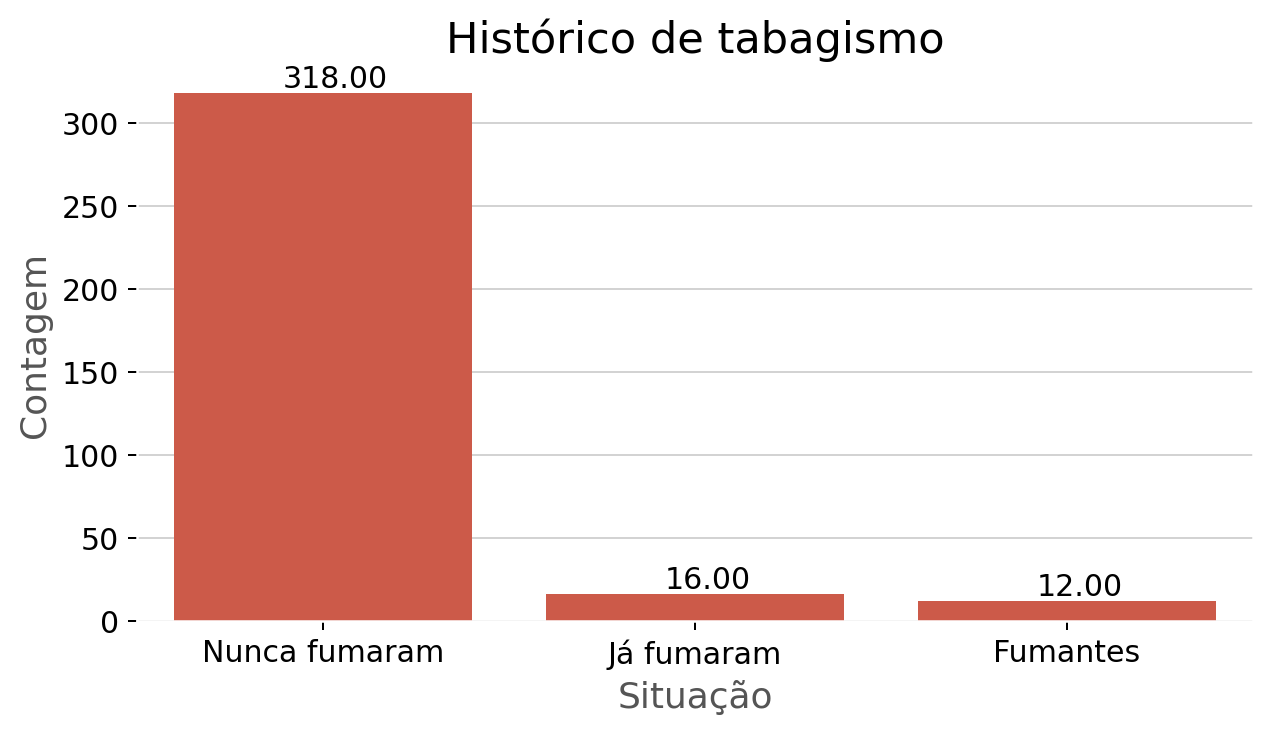

In [22]:
ja_fumaram = tireoide[(tireoide["Hx Smoking"] == "Yes") & (tireoide["Smoking"] == "No")]
contagem_ja_fumaram =  len(ja_fumaram)

nunca_fumaram = tireoide[(tireoide["Hx Smoking"] == "No") & (tireoide["Smoking"] == "No")]
contagem_nunca_fumaram = len(nunca_fumaram)

fumantes = tireoide[tireoide["Smoking"] ==  "Yes"]
contagem_fumantes = len(fumantes)

fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(x=["Nunca fumaram", "Já fumaram", "Fumantes"], y=[contagem_nunca_fumaram, contagem_ja_fumaram, contagem_fumantes])
ax.set_title("Histórico de tabagismo")
ax.set_xlabel("Situação")
ax.set_ylabel("Contagem")

set_annotate(fig)
plt.show()

##### Observações: 
<ul> 
    <li>É possível perceber que uma grande quantidade de pessoas não possuem histórico de tabagismo</li>  
    <li>Analisar o histórico de tabagismo com a permanência da prática pode ser um bom caminho. Será que as pessoas que fumaram e que continuam fumando tiveram mais recorrência do que as que não mantiveram a prática ou ainda as que nem sequer começaram? Esses questionamentos vão ser explorados na análise bivarida.</li>  
    <li>Somente 8% dos pacientes possuem histórico de tabagismo (são fumantes ou já fumaram)</li> 
</ul>


### Avaliações clínicas

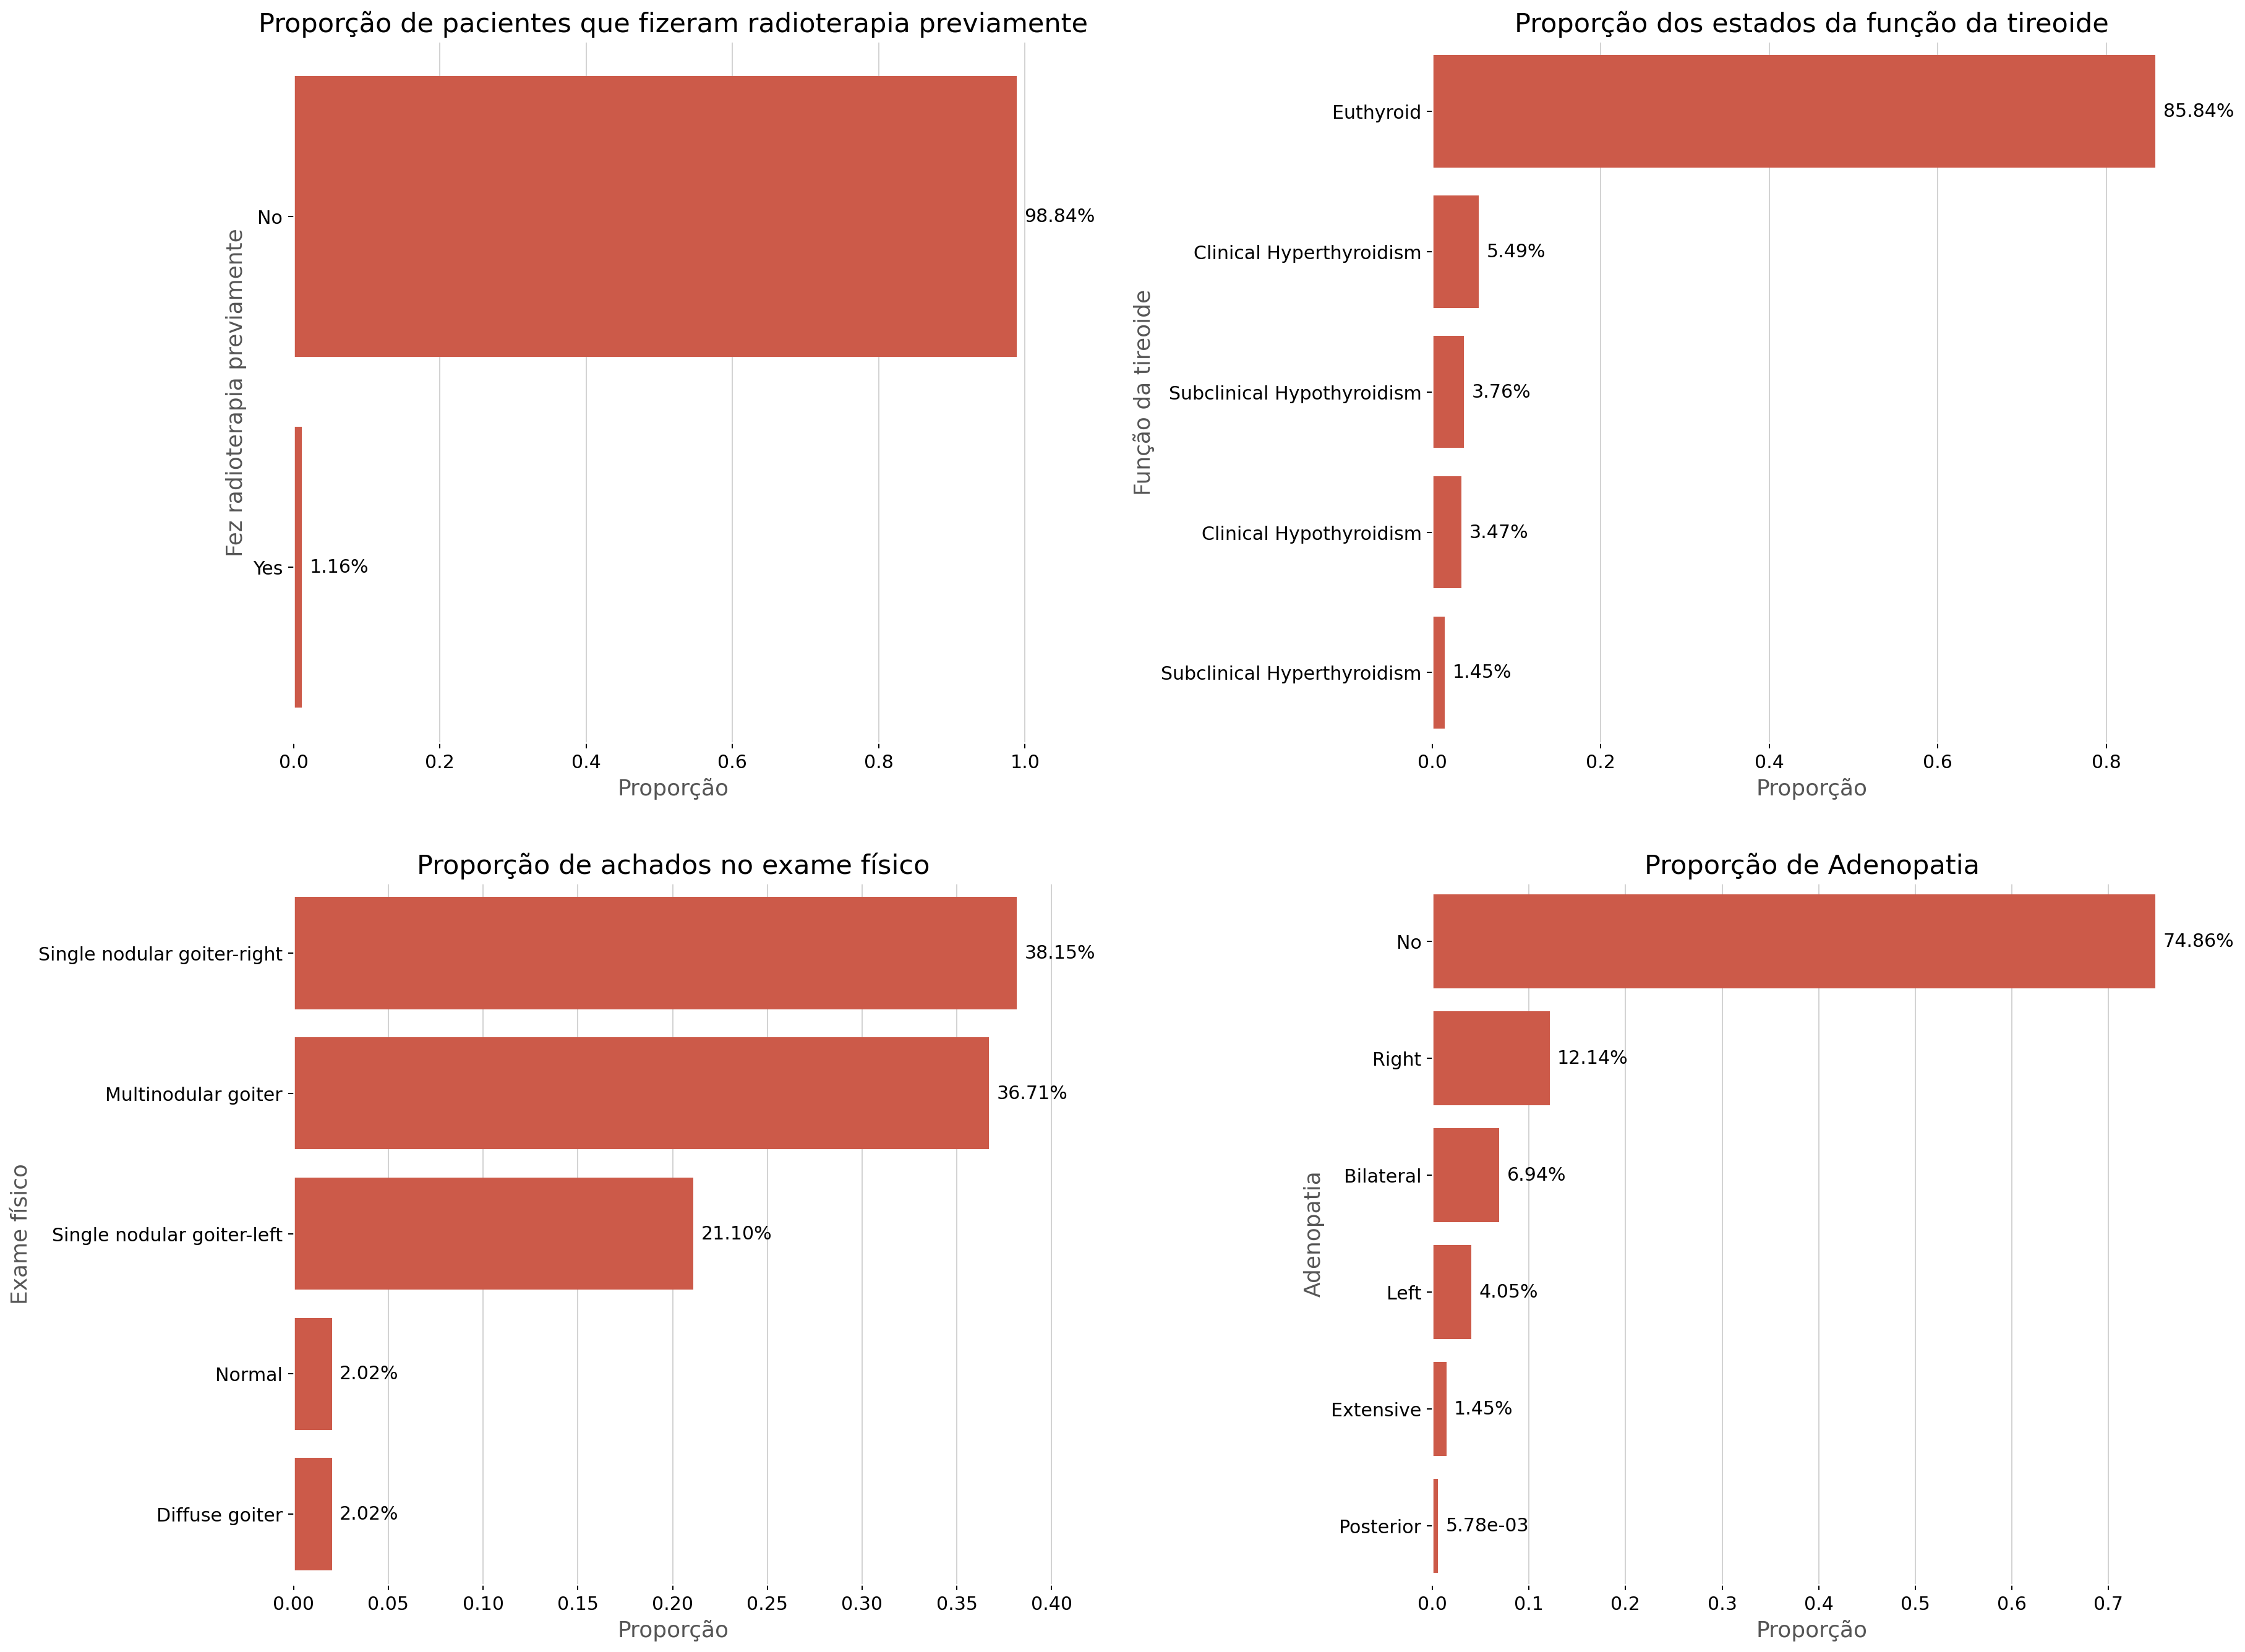

In [23]:
hx_rad_prop = tireoide["Hx Radiothreapy"].value_counts(normalize=True).reset_index()
thy_func_prop = tireoide["Thyroid Function"].value_counts(normalize=True).reset_index()
phys_exam_prop = tireoide["Physical Examination"].value_counts(normalize=True).reset_index()
adeno_prop = tireoide["Adenopathy"].value_counts(normalize=True).reset_index()


fig, ax = plt.subplots(figsize=(22, 18), nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5)

# Gráfico de barras para Hx Radiothreapy
sns.barplot(data=hx_rad_prop, x="proportion", y="Hx Radiothreapy", ax=ax[0][0])
ax[0][0].set_title("Proporção de pacientes que fizeram radioterapia previamente")
ax[0][0].set_xlabel("Proporção")
ax[0][0].set_ylabel("Fez radioterapia previamente")

# Gráfico de barras para Thyroid Function
sns.barplot(data=thy_func_prop, x="proportion", y="Thyroid Function", ax=ax[0][1])
ax[0][1].set_title("Proporção dos estados da função da tireoide")
ax[0][1].set_xlabel("Proporção")
ax[0][1].set_ylabel("Função da tireoide")

# Gráfico de barras para Physical Examination
sns.barplot(data=phys_exam_prop, x="proportion", y="Physical Examination", ax=ax[1][0])
ax[1][0].set_title("Proporção de achados no exame físico")
ax[1][0].set_xlabel("Proporção")
ax[1][0].set_ylabel("Exame físico")

# Gráfico de barras para Adenopathy
sns.barplot(data=adeno_prop, x="proportion", y="Adenopathy", ax=ax[1][1])
ax[1][1].set_title("Proporção de Adenopatia")
ax[1][1].set_xlabel("Proporção")
ax[1][1].set_ylabel("Adenopatia")



set_annotate(fig, h=True, porcentages=True)

plt.show()

##### Observações:
<ul> 
    <li>Apenas 1.83% dos pacientes já tinham feito Radioterapia por qualquer motivo antes do tratamento</li>
    <li>Cerca de 86.7% das pessoas tem a está funcionando normalmente e produzindo a quantidade adequada de hormônios. Dito isso, pode ser útil fazer análises mais específicas em subgrupos com estados alterados da tireoide</li>
    <li>Uma grande porção dos pacientes apresenta múltiplos nódulos ou um nódulo único no lado direito da tireoide. Como será a proporção para diferentes faixas de idade? Será que as distribuições distoam muito conforme o sexo? Essas hipóteses serão exploradas em análises bivariadas.</li>  
    <li>A maior parcela das pessoas não possuem linfonodos em tamanhos anormais(adenopatia), e existem pouquíssimos casos de linfonodos aumentados na região posterior</li>
</ul>

### Resultados patológicos

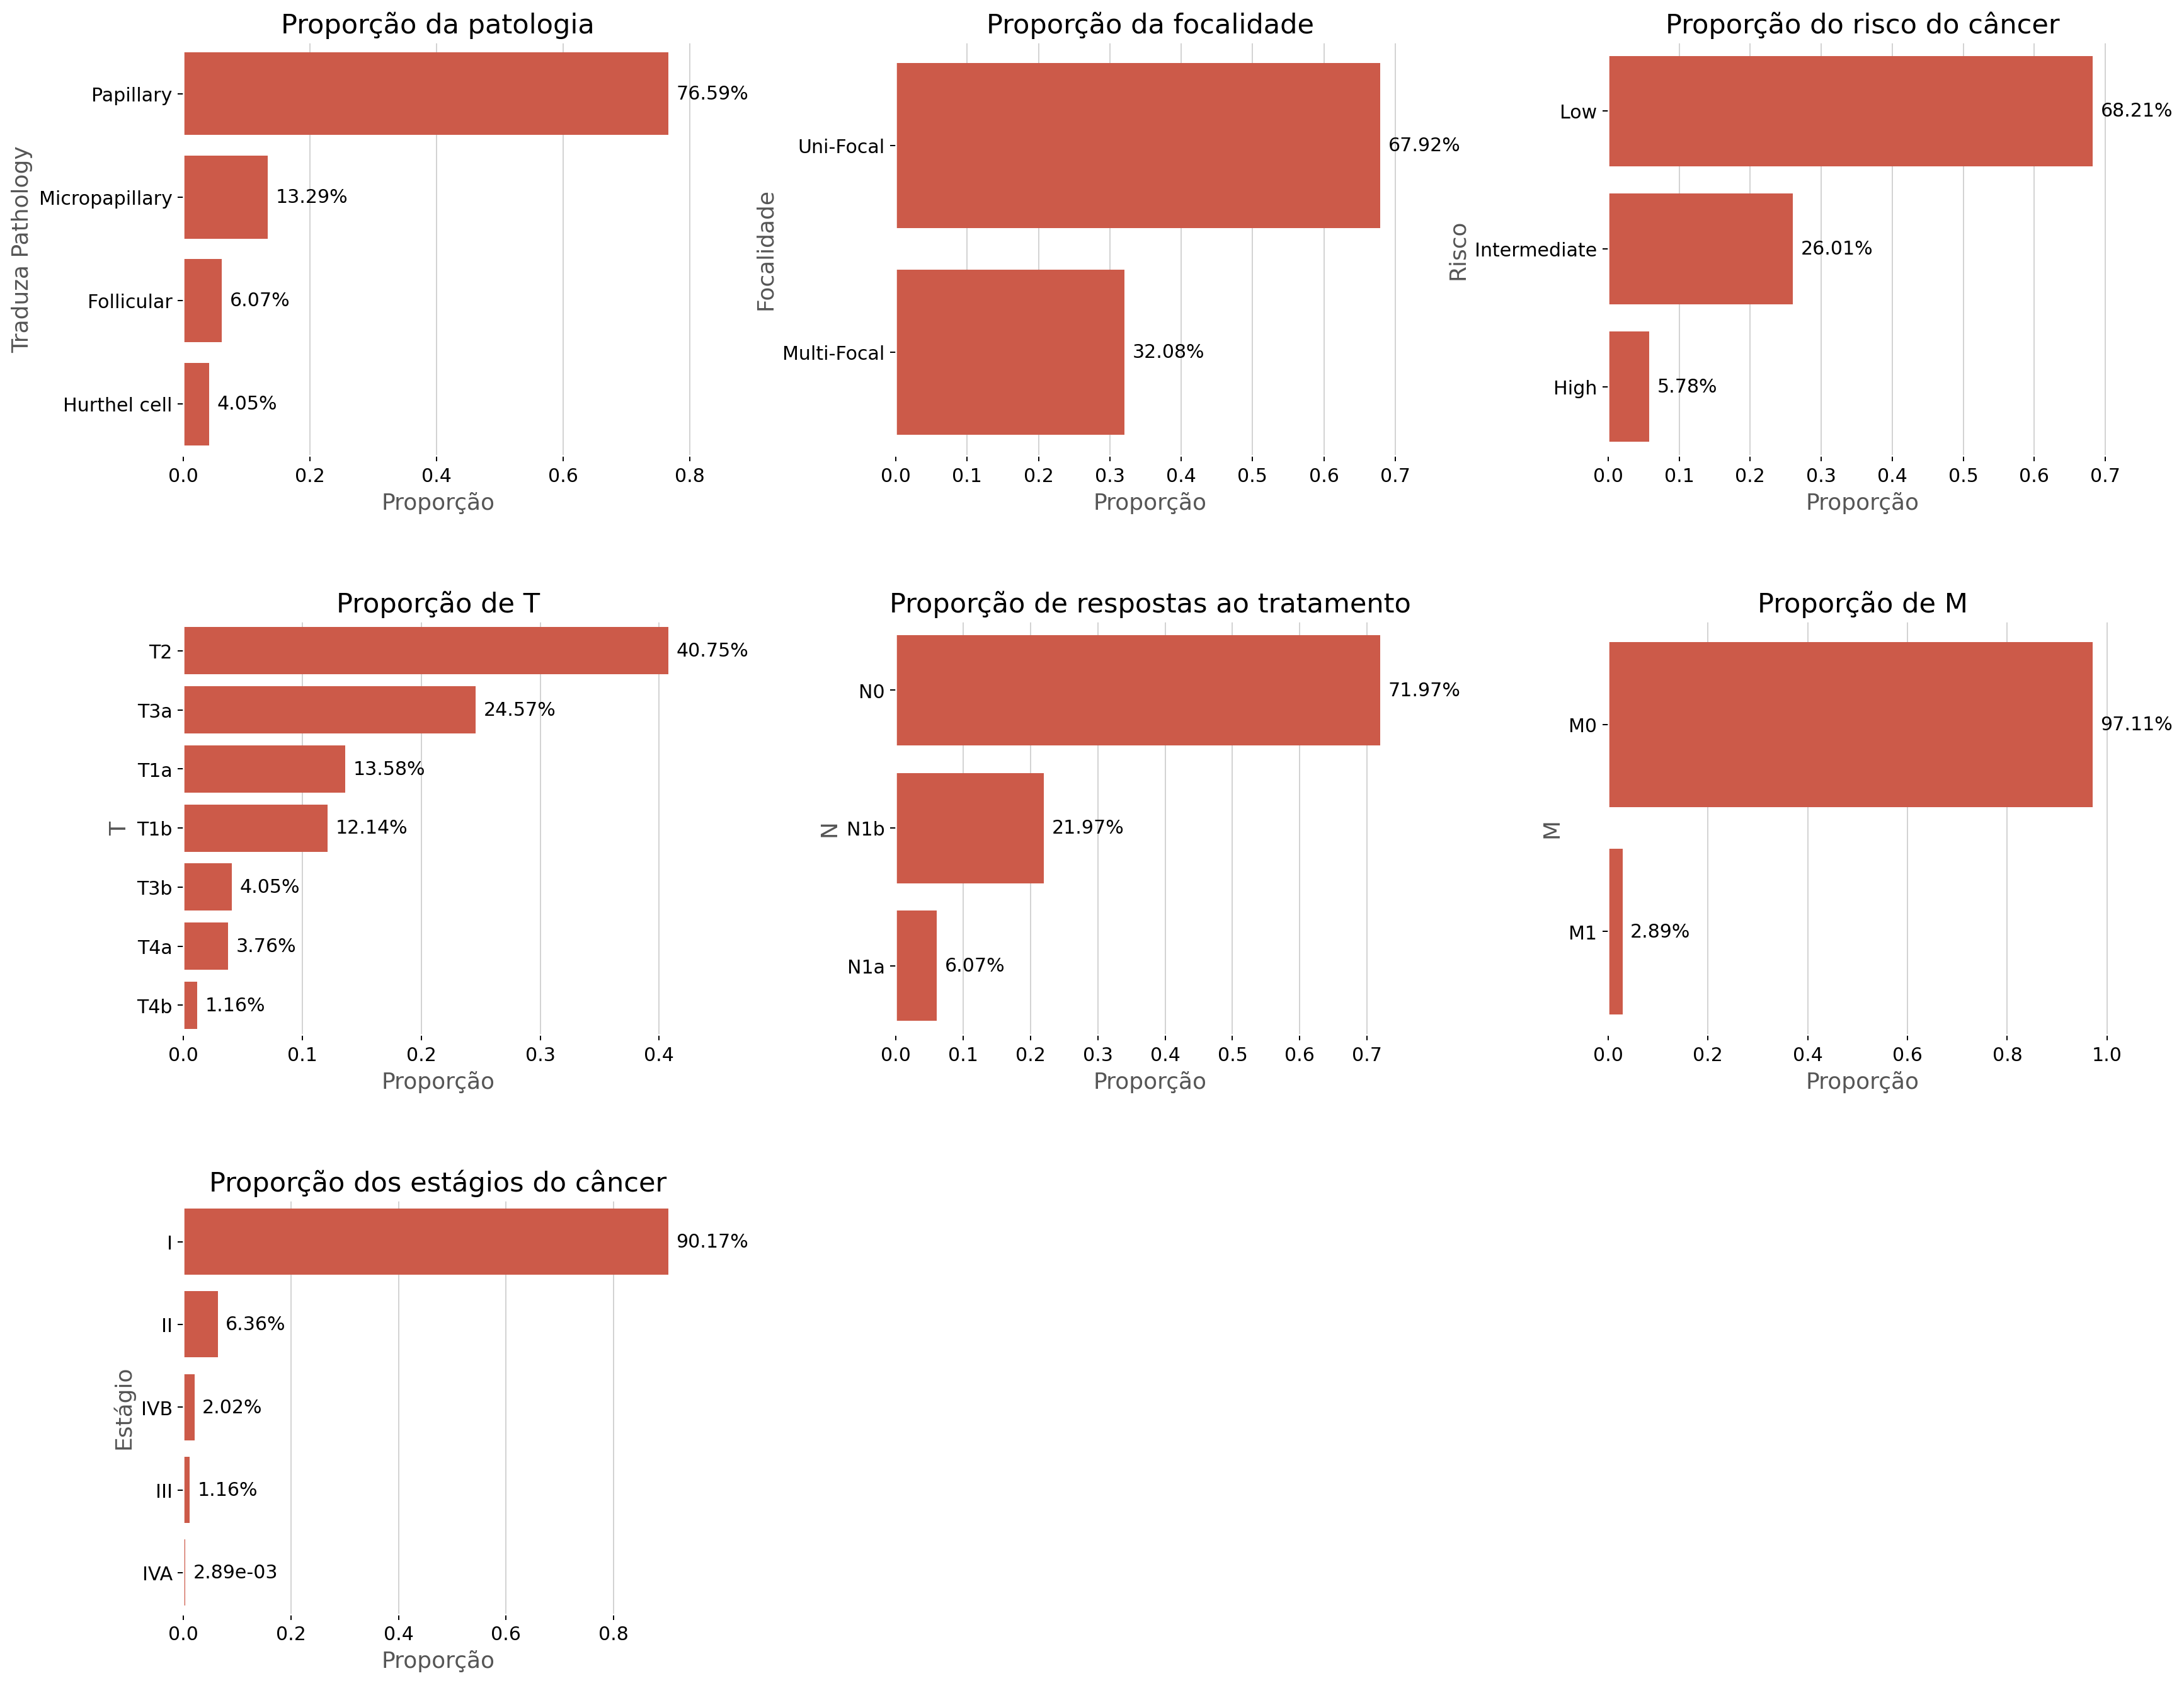

In [24]:
pat_prop = tireoide["Pathology"].value_counts(normalize=True).reset_index()
foc_prop = tireoide["Focality"].value_counts(normalize=True).reset_index()
risk_prop = tireoide["Risk"].value_counts(normalize=True).reset_index()
t_prop = tireoide["T"].value_counts(normalize=True).reset_index()
n_prop = tireoide["N"].value_counts(normalize=True).reset_index()
m_prop = tireoide["M"].value_counts(normalize=True).reset_index()
stage_prop = tireoide["Stage"].value_counts(normalize=True).reset_index()

result_pt_cols = ["Pathology", "Focality", "Risk", "T", "N", "M", "Stage"]

fig, ax = plt.subplots(figsize=(22, 18), nrows=3, ncols=3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.barplot(data=pat_prop, y="Pathology", x="proportion", ax=ax[0][0])
ax[0][0].set_title("Proporção da patologia")
ax[0][0].set_xlabel("Proporção")
ax[0][0].set_ylabel("Traduza Pathology")

# Gráfico de barras para Focality
sns.barplot(data=foc_prop, y="Focality", x="proportion", ax=ax[0][1])
ax[0][1].set_title("Proporção da focalidade")
ax[0][1].set_xlabel("Proporção")
ax[0][1].set_ylabel("Focalidade")

# Gráfico de barras para Risk
sns.barplot(data=risk_prop, y="Risk", x="proportion", ax=ax[0][2])
ax[0][2].set_title("Proporção do risco do câncer")
ax[0][2].set_xlabel("Proporção")
ax[0][2].set_ylabel("Risco")

# Gráfico de barras para T
sns.barplot(data=t_prop, y="T", x="proportion", ax=ax[1][0])
ax[1][0].set_title("Proporção de T")
ax[1][0].set_xlabel("Proporção")
ax[1][0].set_ylabel("T")

# Gráfico de barras para N
sns.barplot(data=n_prop, y="N", x="proportion", ax=ax[1][1])
ax[1][1].set_title("Proporção de respostas ao tratamento")
ax[1][1].set_xlabel("Proporção")
ax[1][1].set_ylabel("N")

# Gráfico de barras para M
sns.barplot(data=m_prop, y="M", x="proportion", ax=ax[1][2])
ax[1][2].set_title("Proporção de M")
ax[1][2].set_xlabel("Proporção")
ax[1][2].set_ylabel("M")

# Gráfico de barras para Stage
sns.barplot(data=stage_prop, y="Stage", x="proportion", ax=ax[2][0])
ax[2][0].set_title("Proporção dos estágios do câncer")
ax[2][0].set_xlabel("Proporção")
ax[2][0].set_ylabel("Estágio")


ax[2,1].axis("off")
ax[2,2].axis("off")

set_annotate(fig, h=True, porcentages=True)

plt.show()

##### Observações:
<ul> 
    <li>"Papilary" é, por muito, o tipo de câncer de tireoide que mais aparece</li>
    <li>Aproximadamente 65,5% dos casos de câncer são limitados a um único local</li>
    <li>A maioria dos casos são de baixo risco</li>  
    <li>As classificações T2 e T3a, com destaque a T2, são as classificações mais comuns nos pacientes</li>
    <li>A maior parte dos pacientes possuem classificação nodal N0 </li>
    <li>Cerca de 95,3% dos pacientes não possuem metástases à distância.</li>
    <li>O estágio de câncer tipo I é o mais comum</li>
</ul>

### Tratamento

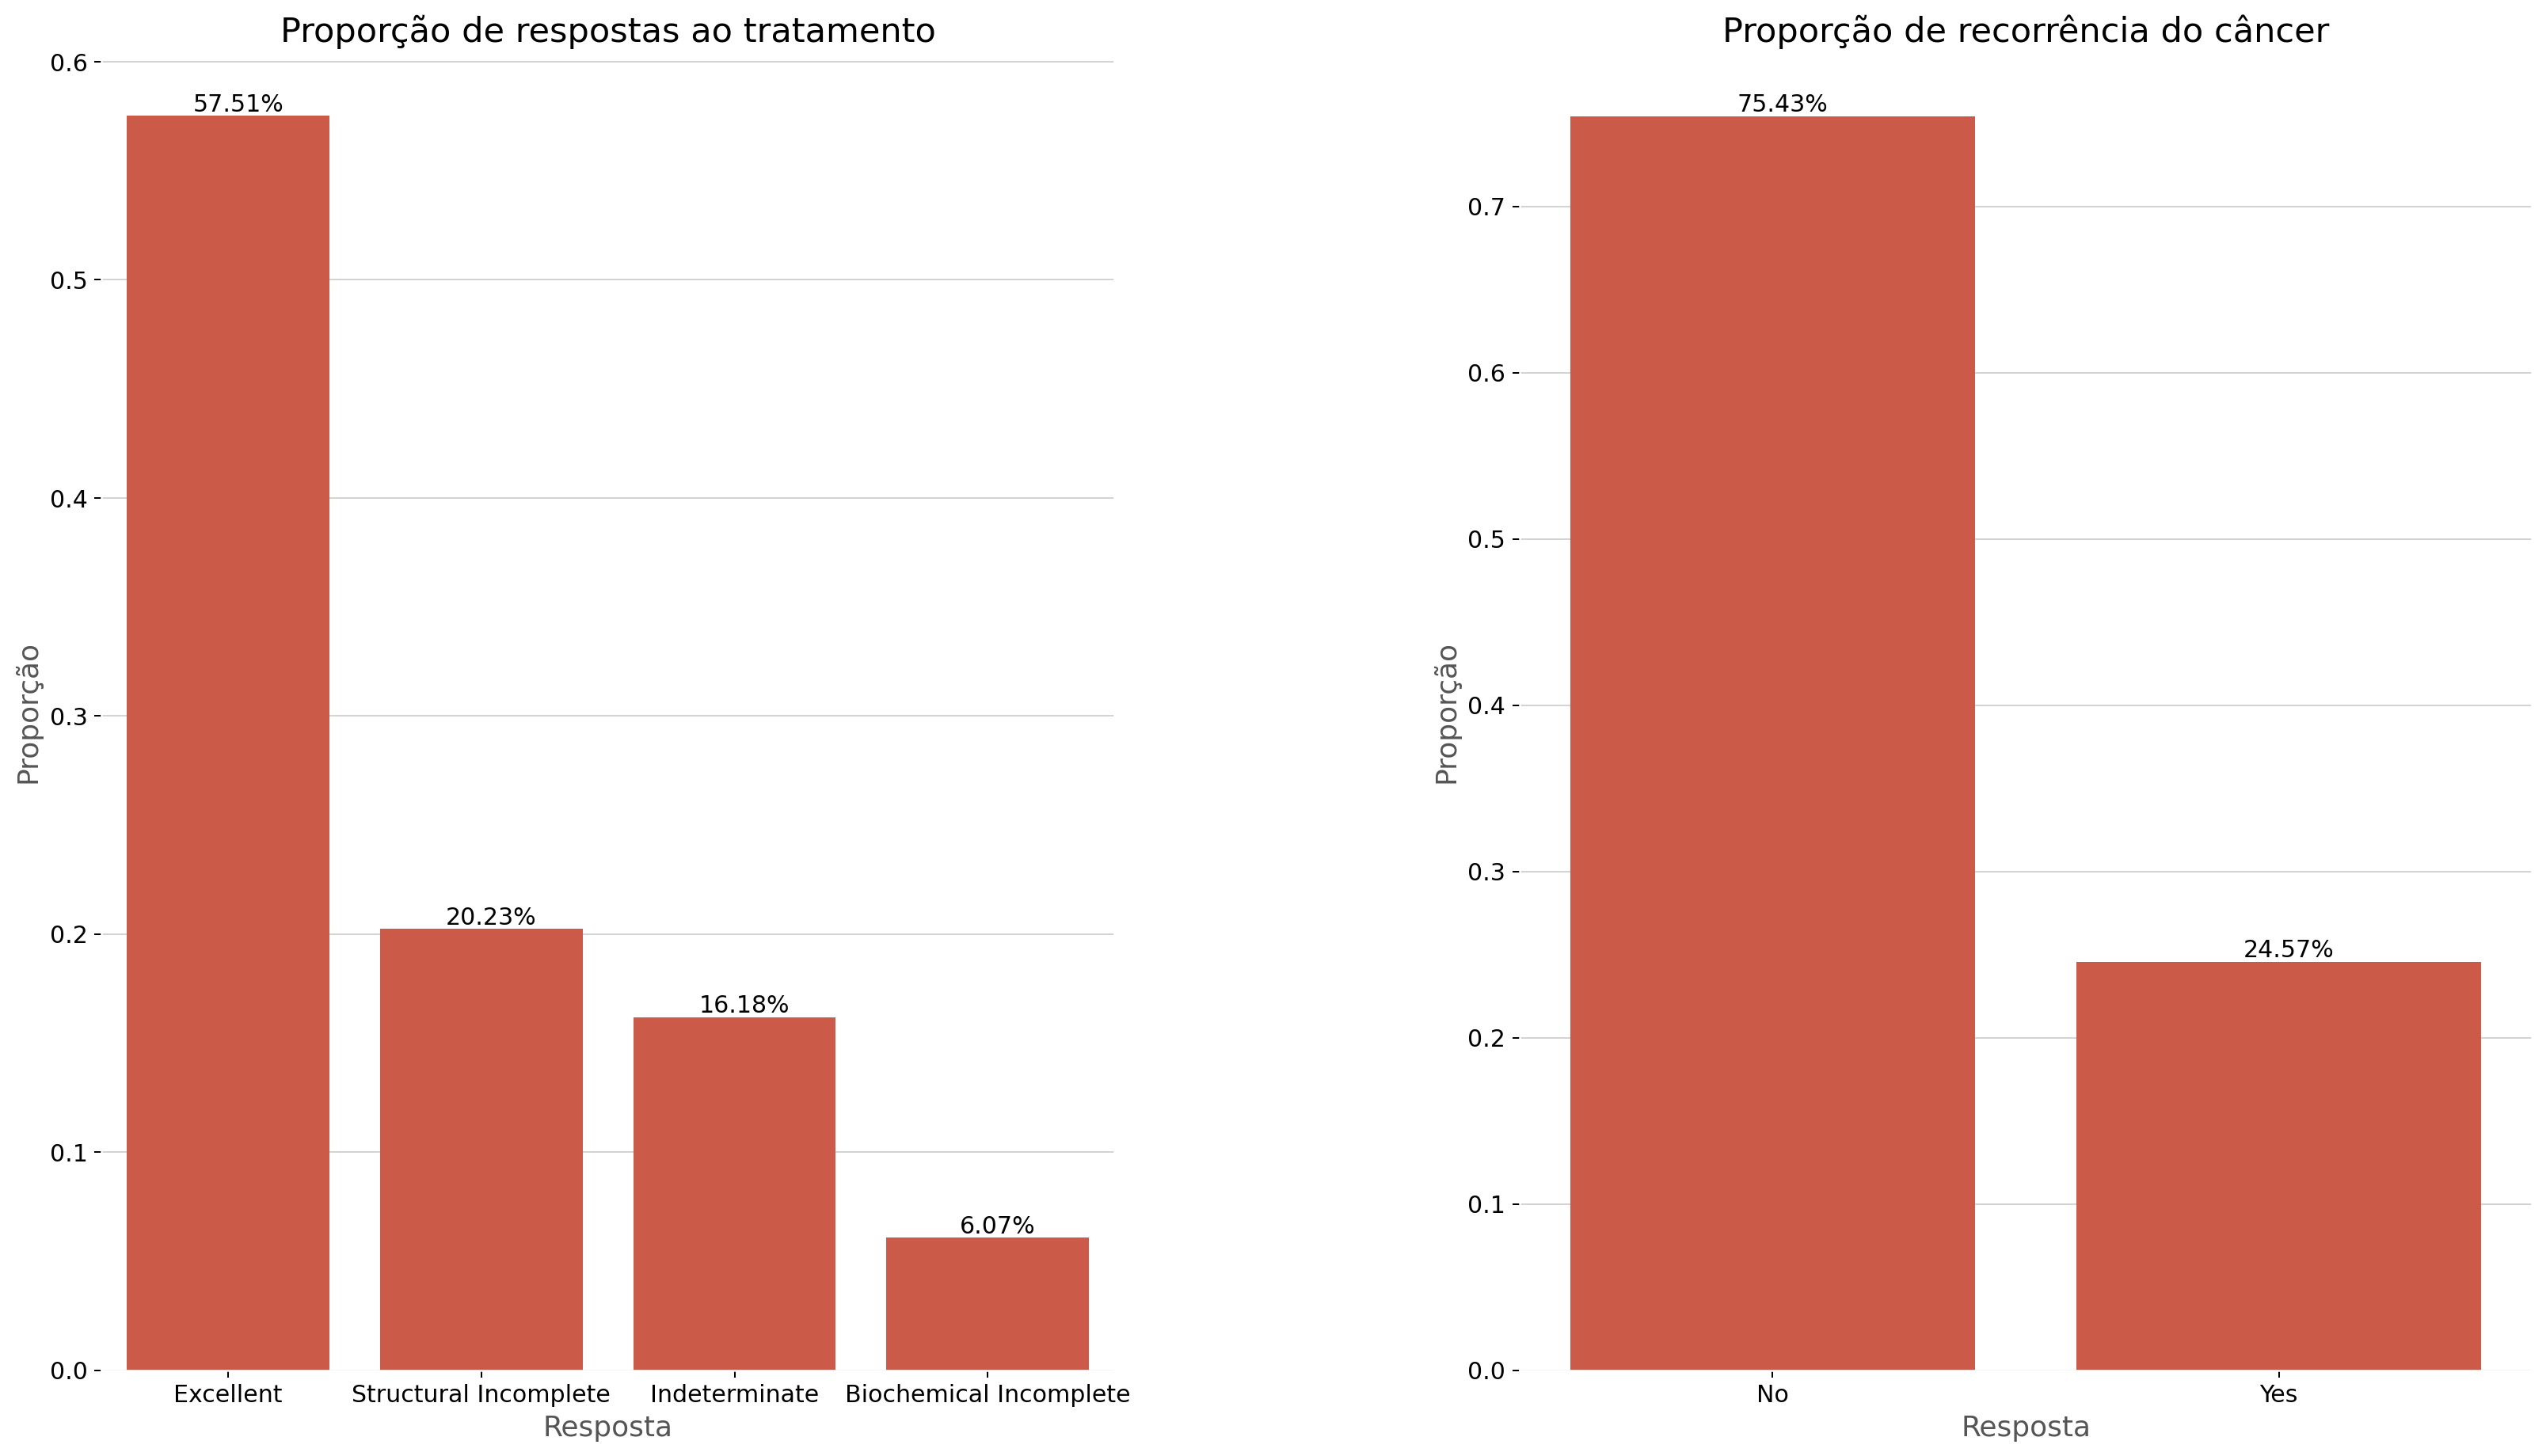

In [25]:

resp_prop = tireoide["Response"].value_counts(normalize=True).reset_index()
rec_prop = tireoide["Recurred"].value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize=(22, 12), ncols=2)
plt.subplots_adjust(wspace=0.4)

sns.barplot(data=resp_prop, y="proportion", x="Response", ax=ax[0])
ax[0].set_title("Proporção de respostas ao tratamento")
ax[0].set_xlabel("Resposta")
ax[0].set_ylabel("Proporção")


sns.barplot(data=rec_prop, y="proportion", x="Recurred", ax=ax[1])
ax[1].set_title("Proporção de recorrência do câncer")
ax[1].set_xlabel("Resposta")
ax[1].set_ylabel("Proporção")



set_annotate(fig, porcentages=True)

##### Observações:
<ul> 
    <li>Para aproximadamente 54,3% o tratamento foi altamente eficaz, é interessante analisar melhor esse grupo para entender se o hábito de fumar ou pertencer a uma certa faixa de idade por exemplo, pode ter contribuído significativamente para isso</li>
    <li>Quase 30% dos pacientes tiveram evidências físicas ou químicas de que o câncer não havia sido eliminado completamente</li>
    <li>Cerca de 28,2% dos pacientes tiveram recorrência de câncer, assim como citado na primeira observação, seria interessante analisar melhor esse grupo. E é claro que isso será feito em análises mais a frente.</li>  
</ul>

## Análise Bivariada e Multivarada

### Recorrência do câncer para idades mais avançadas

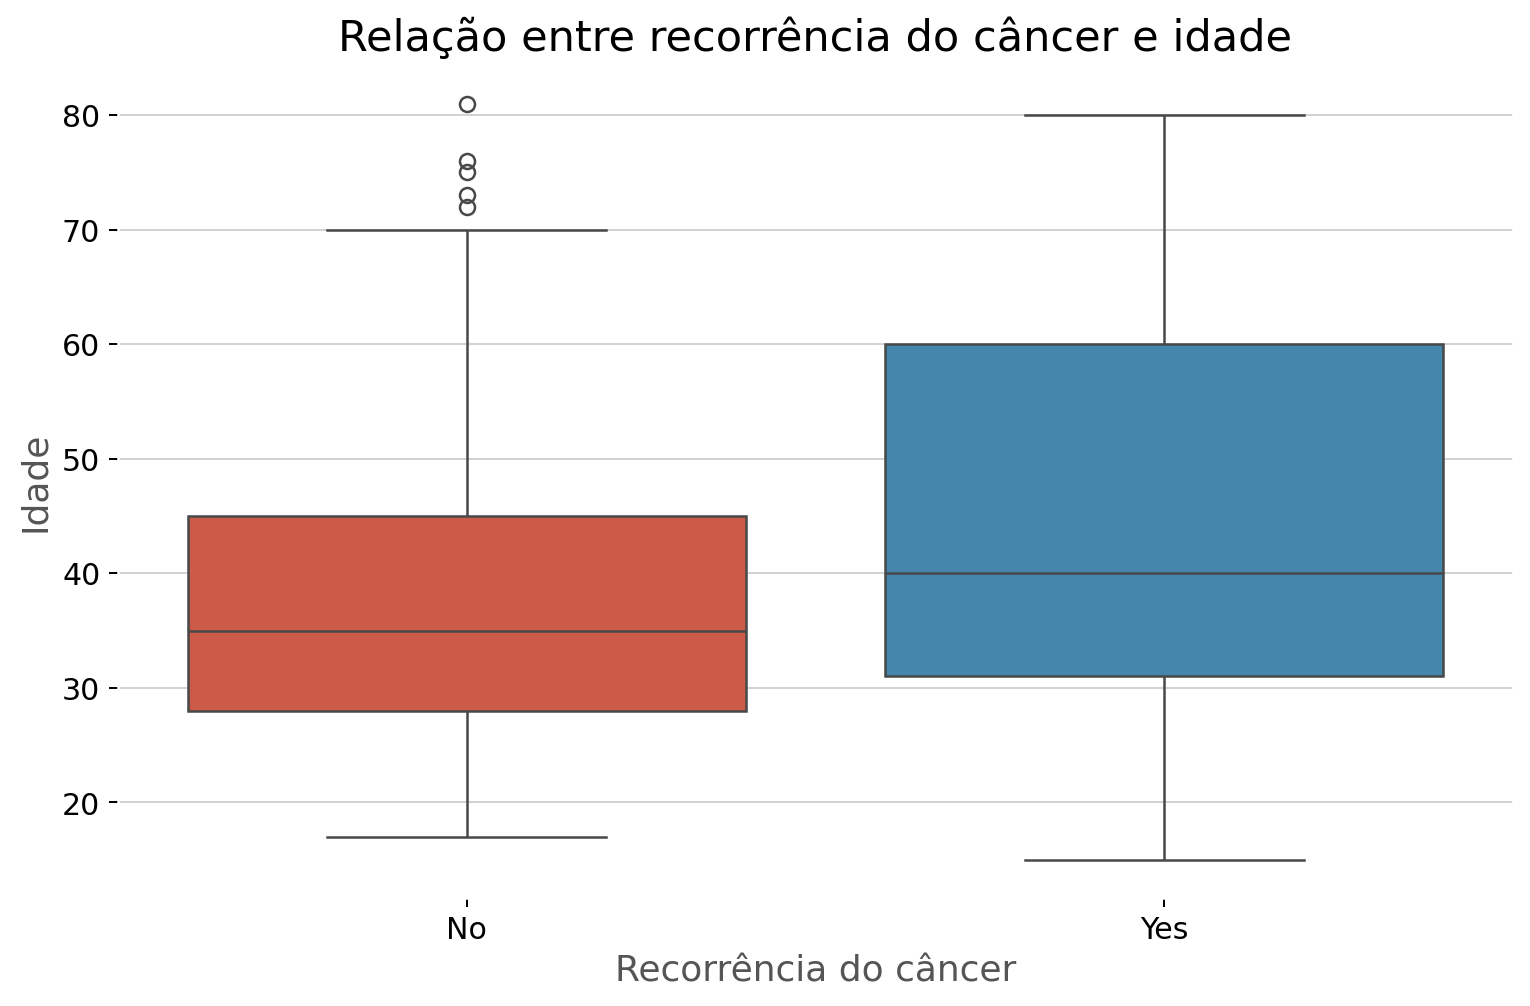

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data=tireoide, x="Recurred", y="Age", hue="Recurred", ax=ax)

ax.set_xlabel("Recorrência do câncer")
ax.set_ylabel("Idade")


plt.title("Relação entre recorrência do câncer e idade")
plt.show()

##### Observações:
<ul> 
    <li>A proporção de pessoas que tiveram recorrência do câncer é maior nas regiões acima dos 50 anos</li>
    <li>A faixa de idade que 50% das pessoas tiveram recorrência do câncer é bem próxima da idade de 75% que não tiveram recorrência, o que evidencia que grupos com idades mais avançadas tendem a ter mais recorrência do que os grupos que não tem uma idade tão avançada assim</li>
    <li>Há registros de ambas as possibilidades em faixas próximas dos 80 anos, sendo a não recorrência acima dos 70 anos considerada outlier</li>  
    <li>Parece que para idades mais avançadas, idade é um bom indicador de recorrência</li>
    
</ul>

### Recorrência do câncer detalhada em intervalos de idade

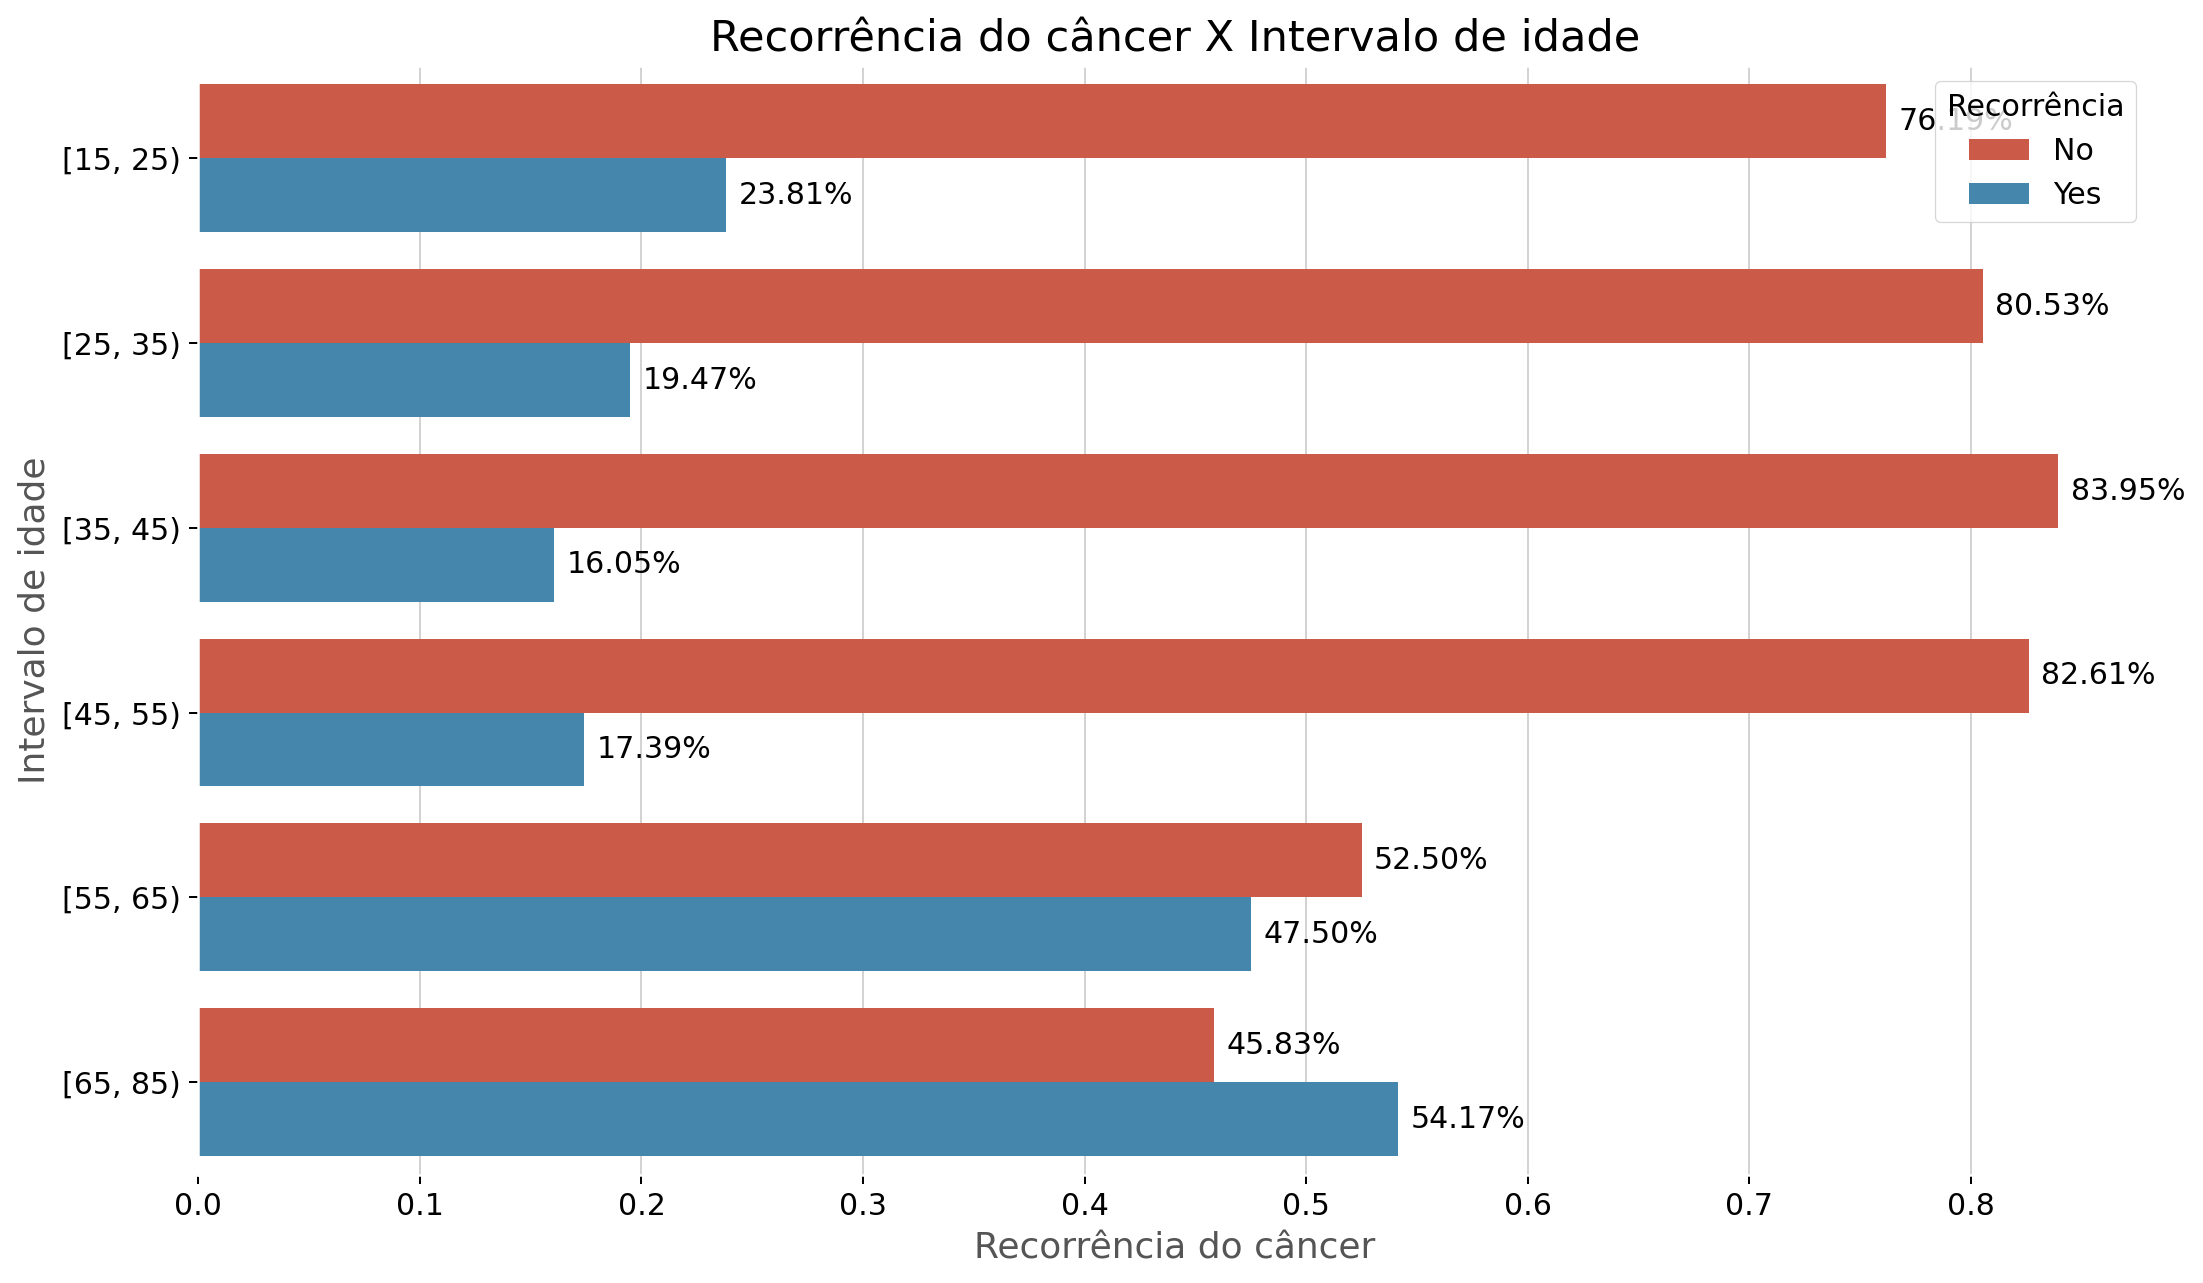

In [27]:
age_rec_prop = tireoide.groupby(["Age_bin"])["Recurred"].value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(data=age_rec_prop, x="proportion", y="Age_bin", hue="Recurred")
plt.title("Recorrência do câncer X Intervalo de idade")
ax.set_xlabel("Recorrência do câncer")
ax.set_ylabel("Intervalo de idade")
ax.get_legend().set_title("Recorrência")

set_annotate(fig, h=True, porcentages=True)
plt.show()

##### Observações
<ul> 
    <li>Acima de 55 anos, os grupos que possuem recorrência crescem significativamente, com destaque para o intervalo entre acima dos 65 anos, onde o grupo que teve recorrência de câncer ultrapasse aquele que não teve</li> 
</ul>

### Proporção do risco detalhada em intervalos de idade

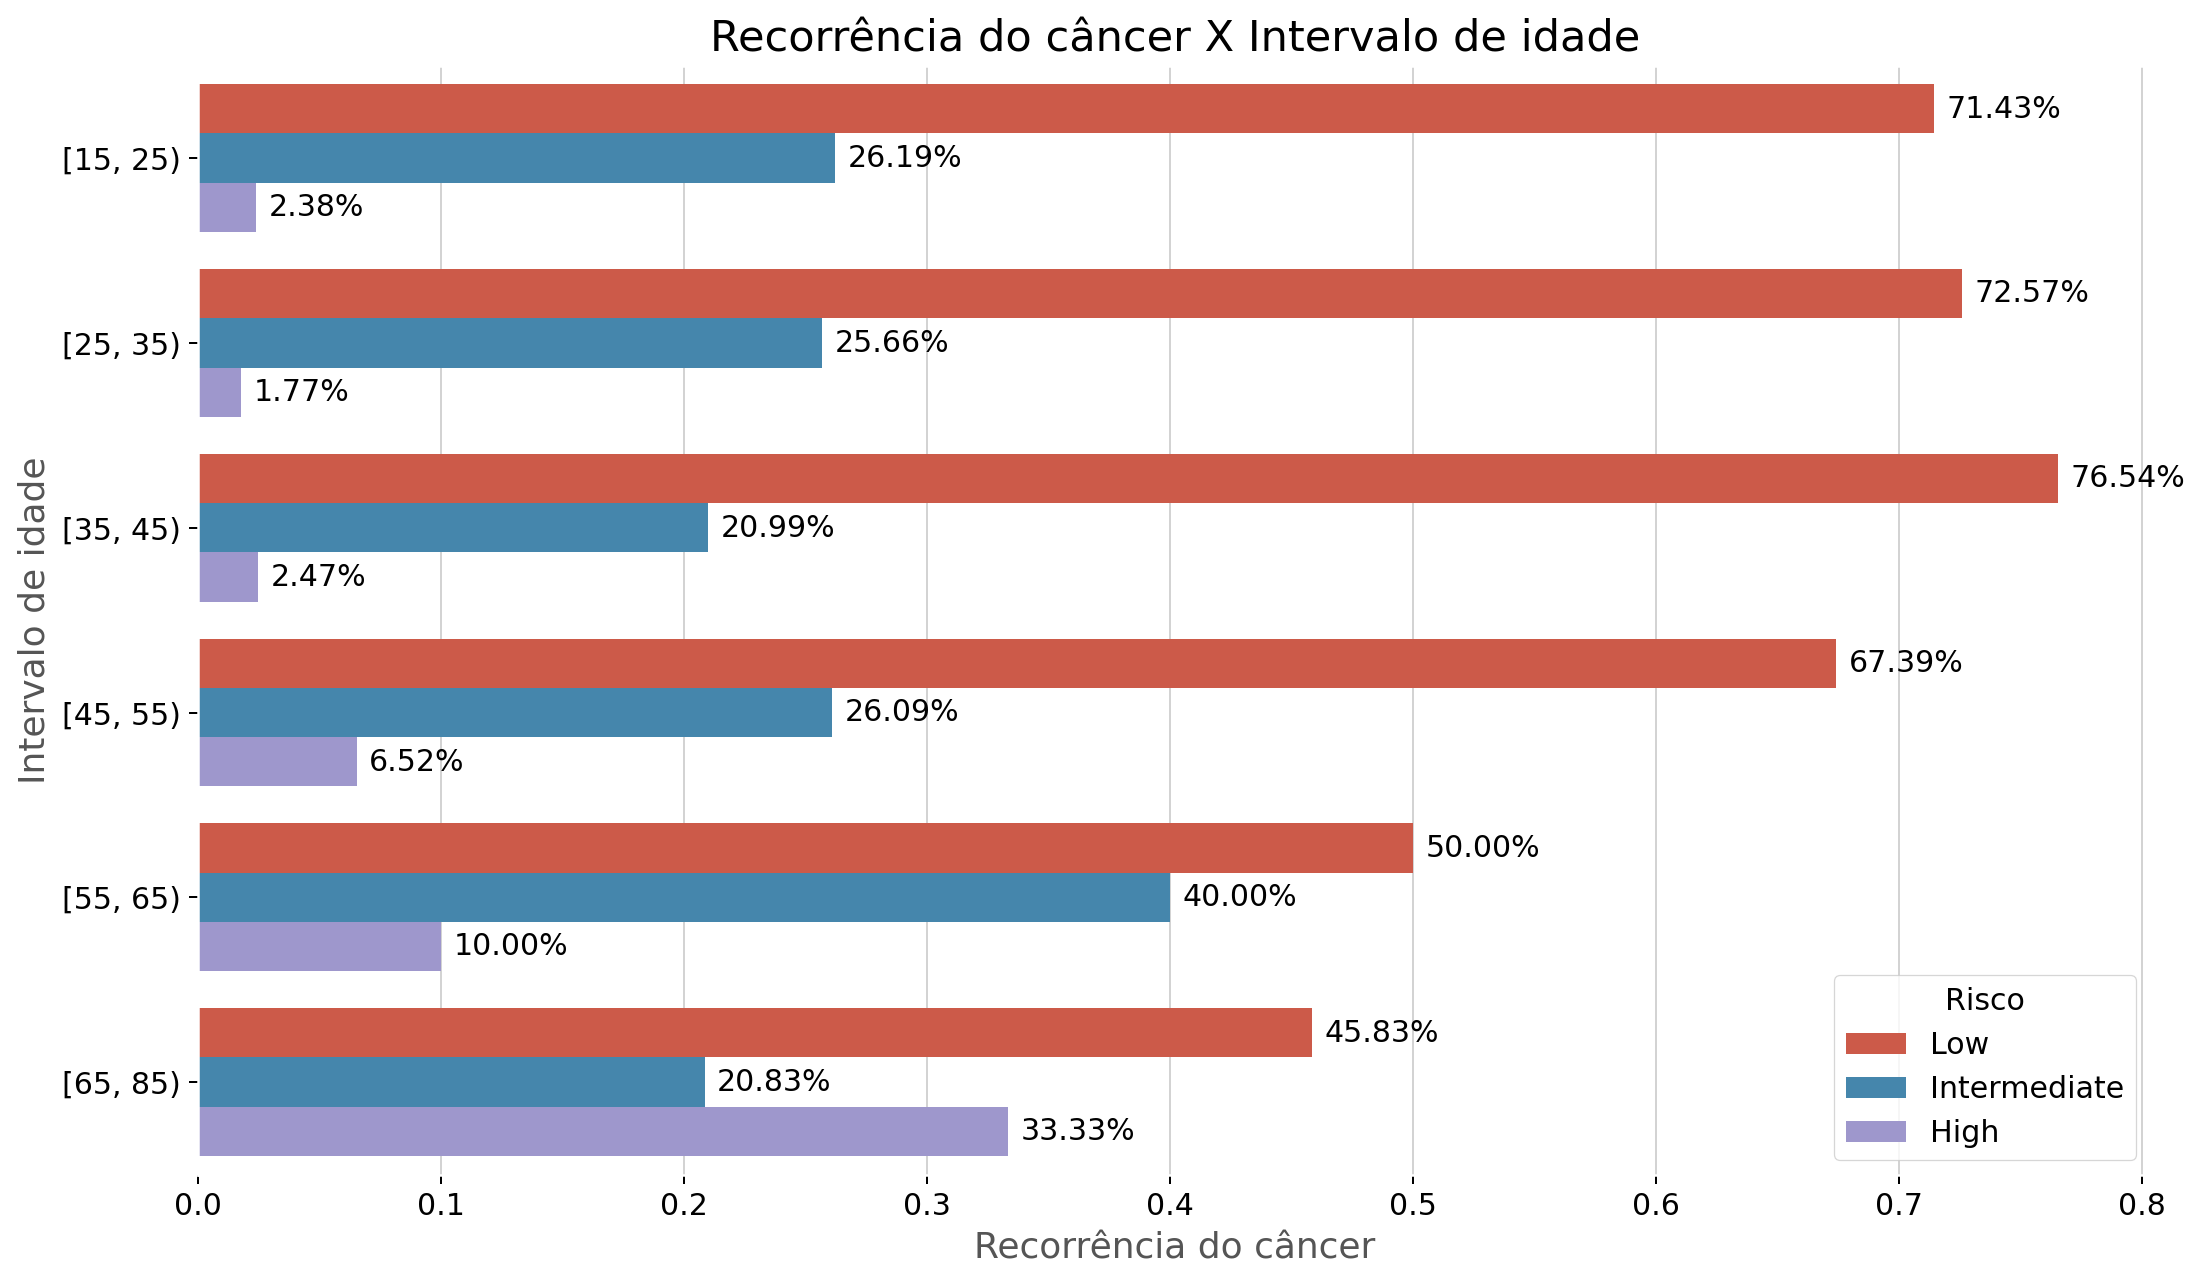

In [28]:
age_risk_prop = tireoide.groupby(["Age_bin"])["Risk"].value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(data=age_risk_prop, x="proportion", y="Age_bin", hue="Risk")
plt.title("Recorrência do câncer X Intervalo de idade")
ax.set_xlabel("Recorrência do câncer")
ax.set_ylabel("Intervalo de idade")
ax.get_legend().set_title("Risco")


set_annotate(fig, h=True, porcentages=True)
plt.show()

##### Observações
<ul> 
    <li>Semelhante a recorrência, o risco intermediário e o risco avançado crescem significativamente em faixas acima dos 55 anos, onde em faixas acima dos 65 anos os grupos que tiveram baixo risco são minoria</li>
</ul>

### Recorrência de câncer detalhada em intervalos de idade e segmentada por sexo

In [29]:
# Exibindo contagem antes de plotar a proporção visando uma melhor interpretação da porcentagem
age_fm_rec = tireoide.groupby(["Age_bin", "Gender"])["Recurred"].value_counts().reset_index()

age_fm_rec

,Age_bin,Gender,Recurred,count
0,"[15, 25)",F,No,27
1,"[15, 25)",F,Yes,8
2,"[15, 25)",M,No,5
3,"[15, 25)",M,Yes,2
4,"[25, 35)",F,No,87
5,"[25, 35)",F,Yes,17
6,"[25, 35)",M,Yes,5
7,"[25, 35)",M,No,4
8,"[35, 45)",F,No,64
9,"[35, 45)",F,Yes,9


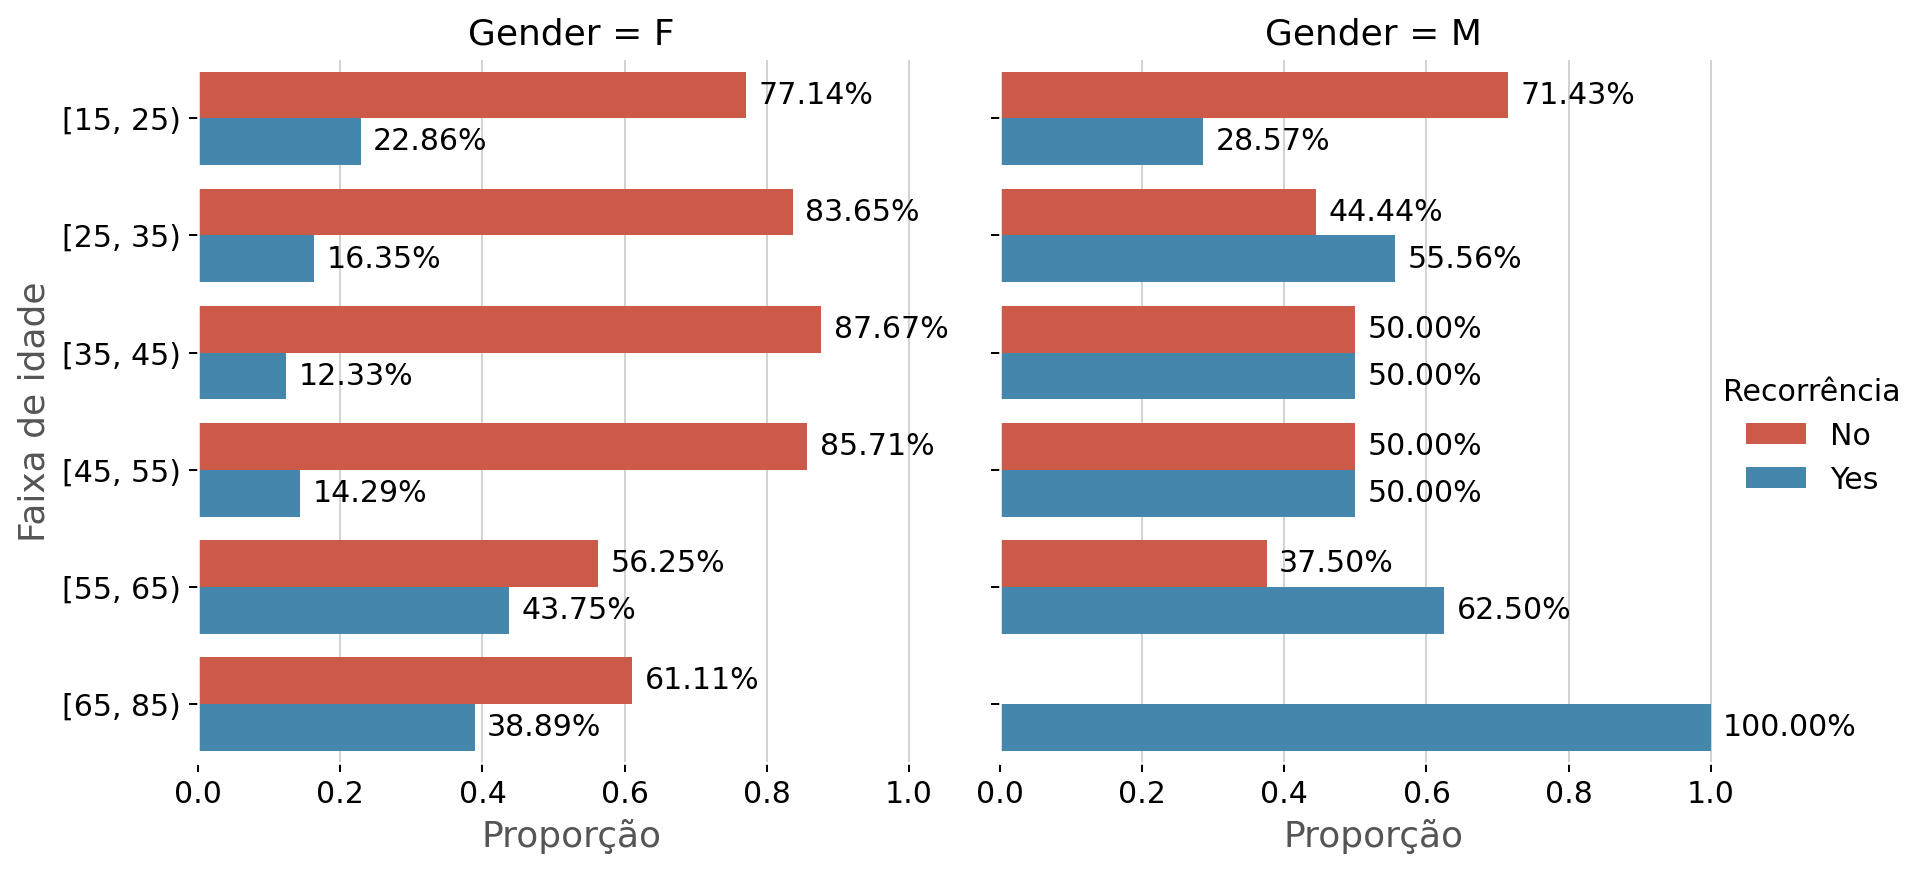

In [30]:
age_fm_rec_prop = tireoide.groupby(["Age_bin", "Gender"])["Recurred"].value_counts(normalize=True).reset_index()

catplot = sns.catplot(data=age_fm_rec_prop, y="Age_bin", x="proportion", hue="Recurred", col="Gender", kind="bar")
catplot.set_xlabels("Proporção")
catplot.set_ylabels("Faixa de idade")

grid = catplot._legend
grid.set_title("Recorrência")

set_annotate(catplot.figure, h=True, porcentages=True)

##### Observações
<ul> 
    <li>Olhando apenas para o grupo das mulheres, temos que a proporção de recorrência do câncer entre as faixas de 55 a 84 anos é bastante significativa, com grande aumento da proporção desse grupo se comparado com a faixa de idade anterior</li>
    <li>Por outro lado, no grupo dos homens temos que quase todas as faixas de idade possuem uma parcela bastante significativa dos grupos que tiveram recorrência do câncer, com um grande crescimento nos 25 anos em diante. Isso pode ocorrer devido a pouca quantidade de amostras de homens, que já são minoria no conjunto de dados, nessa faixa de idade, ou a possível existente relação entre essas características</li>  


    
</ul>

### Estágio do câncer e resposta ao tratamento segmentados por intervalos de idade

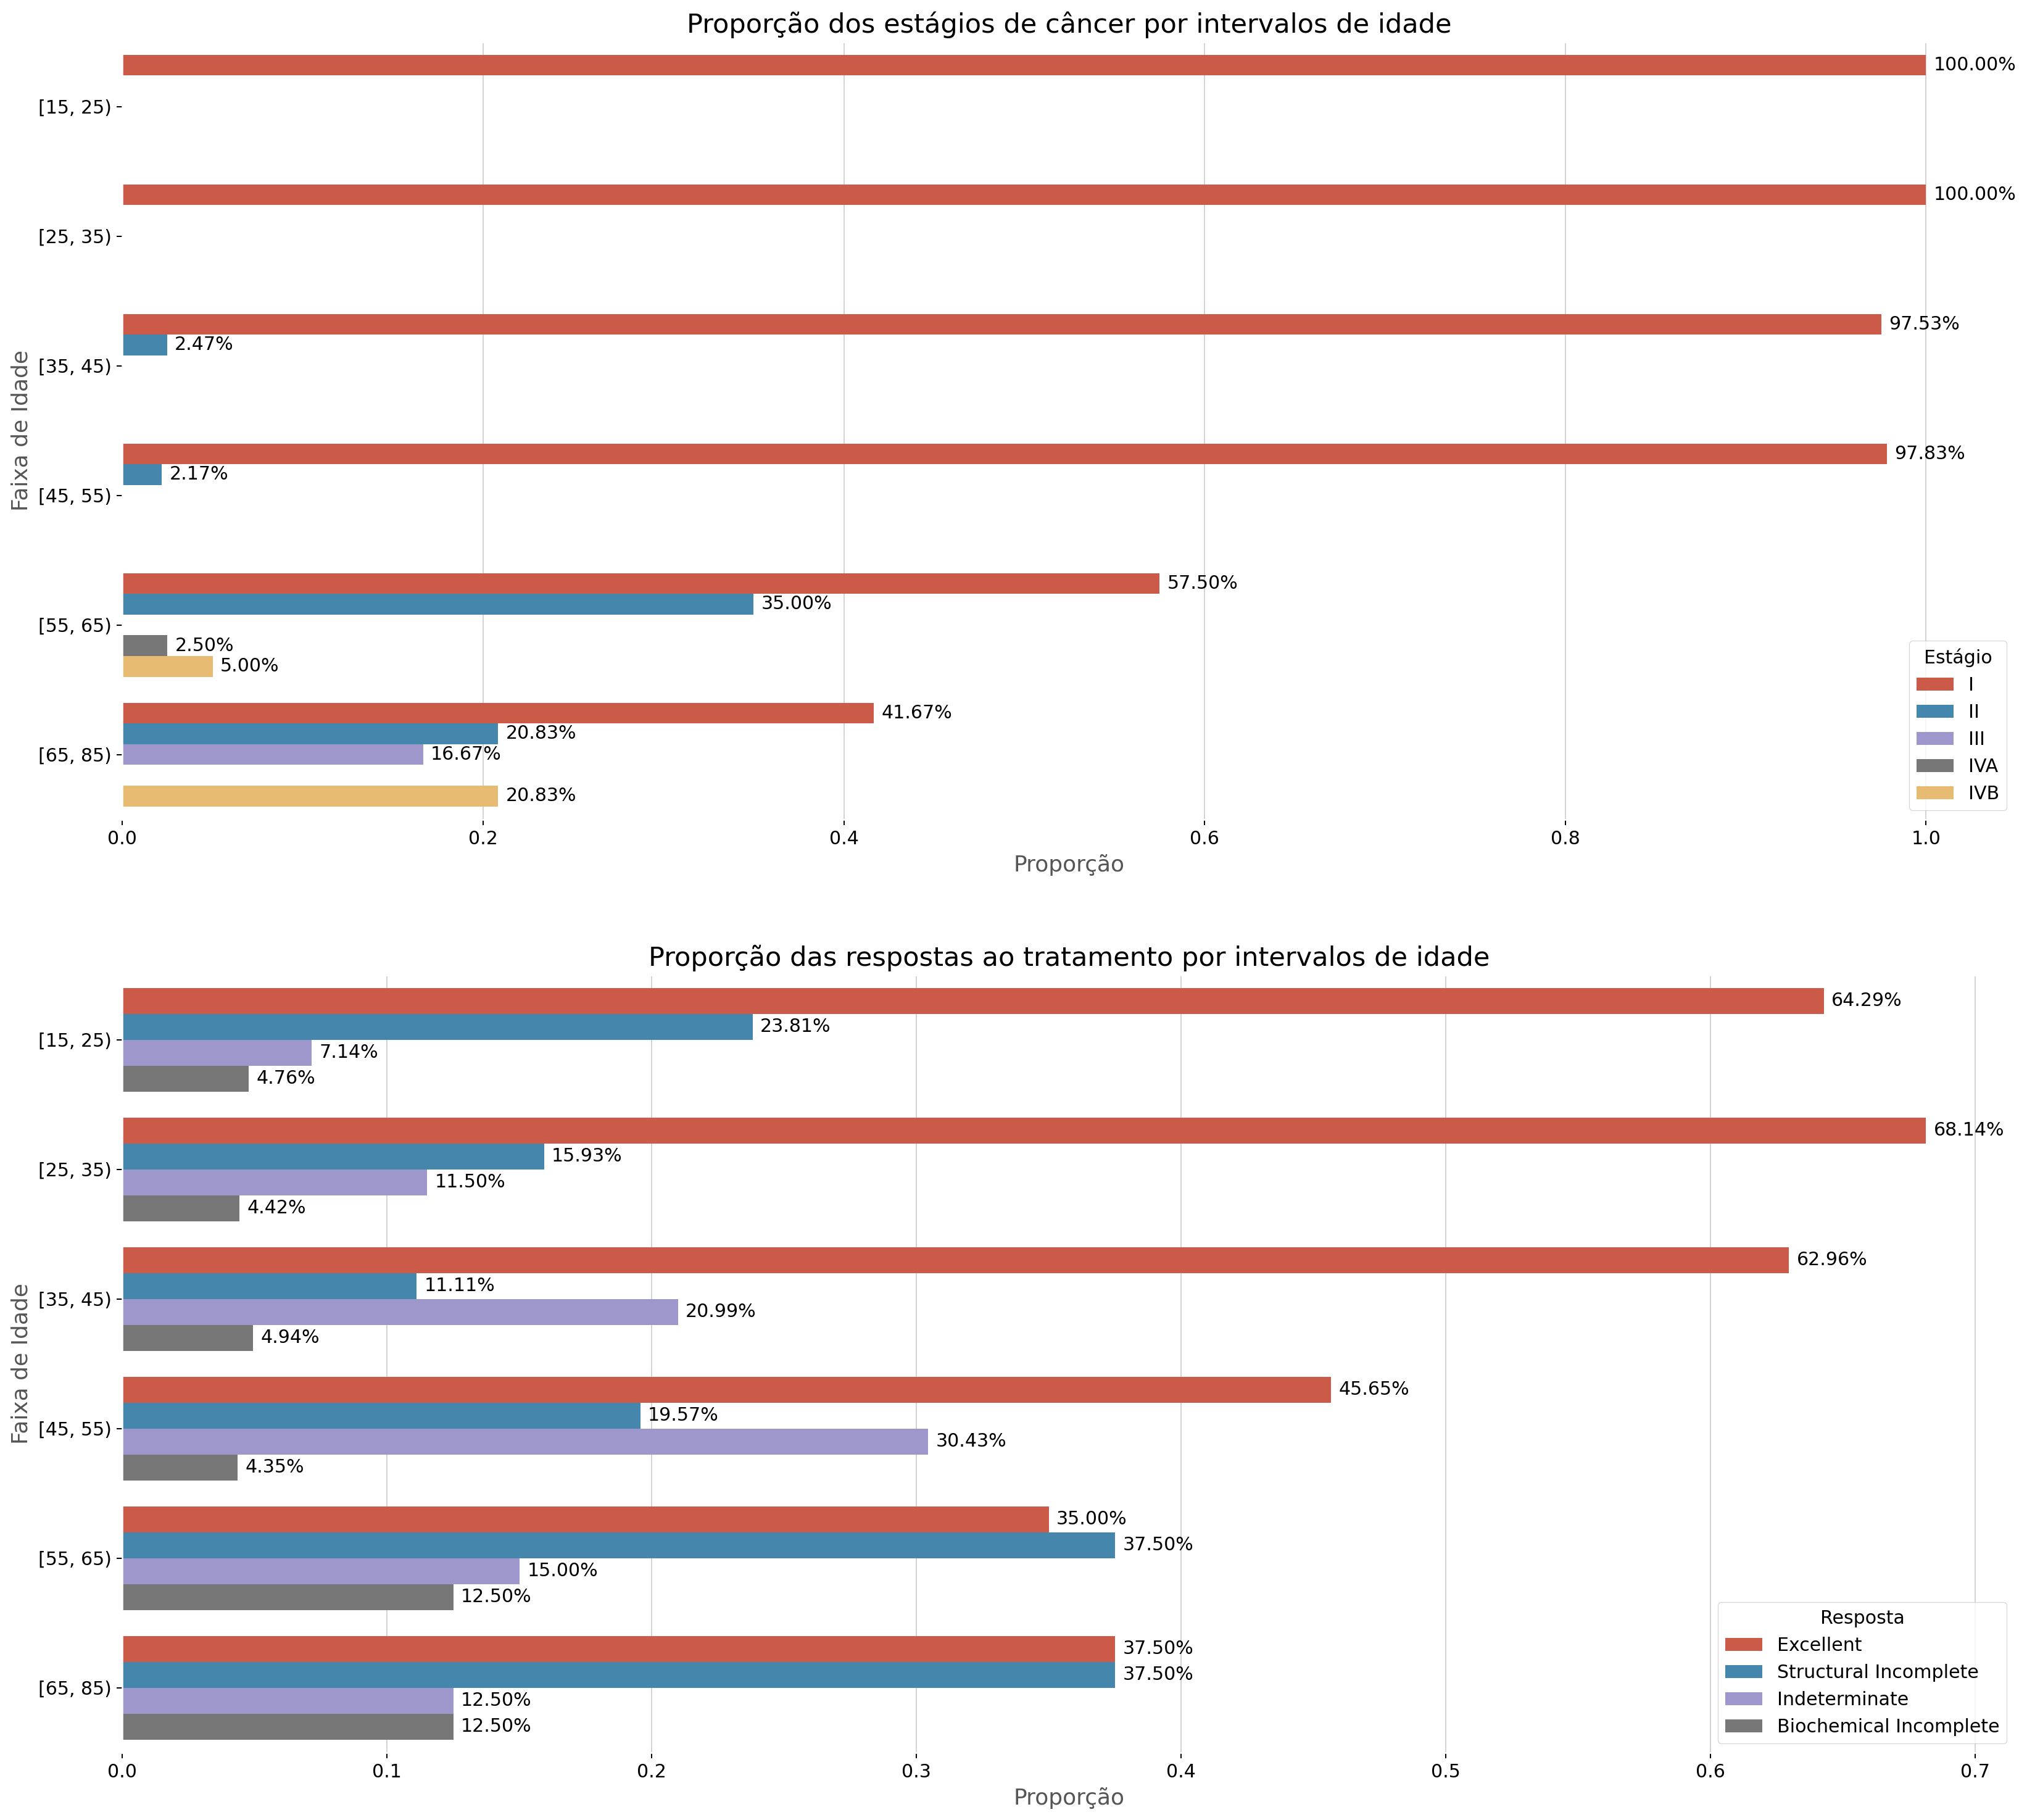

In [31]:
age_stag_prop = tireoide.groupby(["Age_bin"])["Stage"].value_counts(normalize=True).reset_index()
age_resp_prop = tireoide.groupby(["Age_bin"])["Response"].value_counts(normalize=True).reset_index()


fig, ax = plt.subplots(figsize=(22, 20), nrows=2)

sns.barplot(data=age_stag_prop, x="proportion", y="Age_bin", hue="Stage", ax=ax[0])
ax[0].set_title("Proporção dos estágios de câncer por intervalos de idade")
ax[0].set_xlabel("Proporção")
ax[0].set_ylabel("Faixa de Idade")
ax[0].get_legend().set_title("Estágio")

sns.barplot(data=age_resp_prop, x="proportion", y="Age_bin", hue="Response", ax=ax[1])
ax[1].set_title("Proporção das respostas ao tratamento por intervalos de idade")
ax[1].set_xlabel("Proporção")
ax[1].set_ylabel("Faixa de Idade")
ax[1].get_legend().set_title("Resposta")

set_annotate(fig, h=True, porcentages=True)


plt.show()

##### Observações
<ul> 
    <li>Há somente uma expressão significativa dos estágios II, III e IV(A e B), após a faixa dos 55 anos</li>
    <li>Até a faixa dos 44 anos, mais da metade das respostas ao tratamento foram excelentes, com crescente de respostas negativas e indeterminadas após essa faixa, com dastaque para faixas acima dos 55 anos</li>
    
</ul>

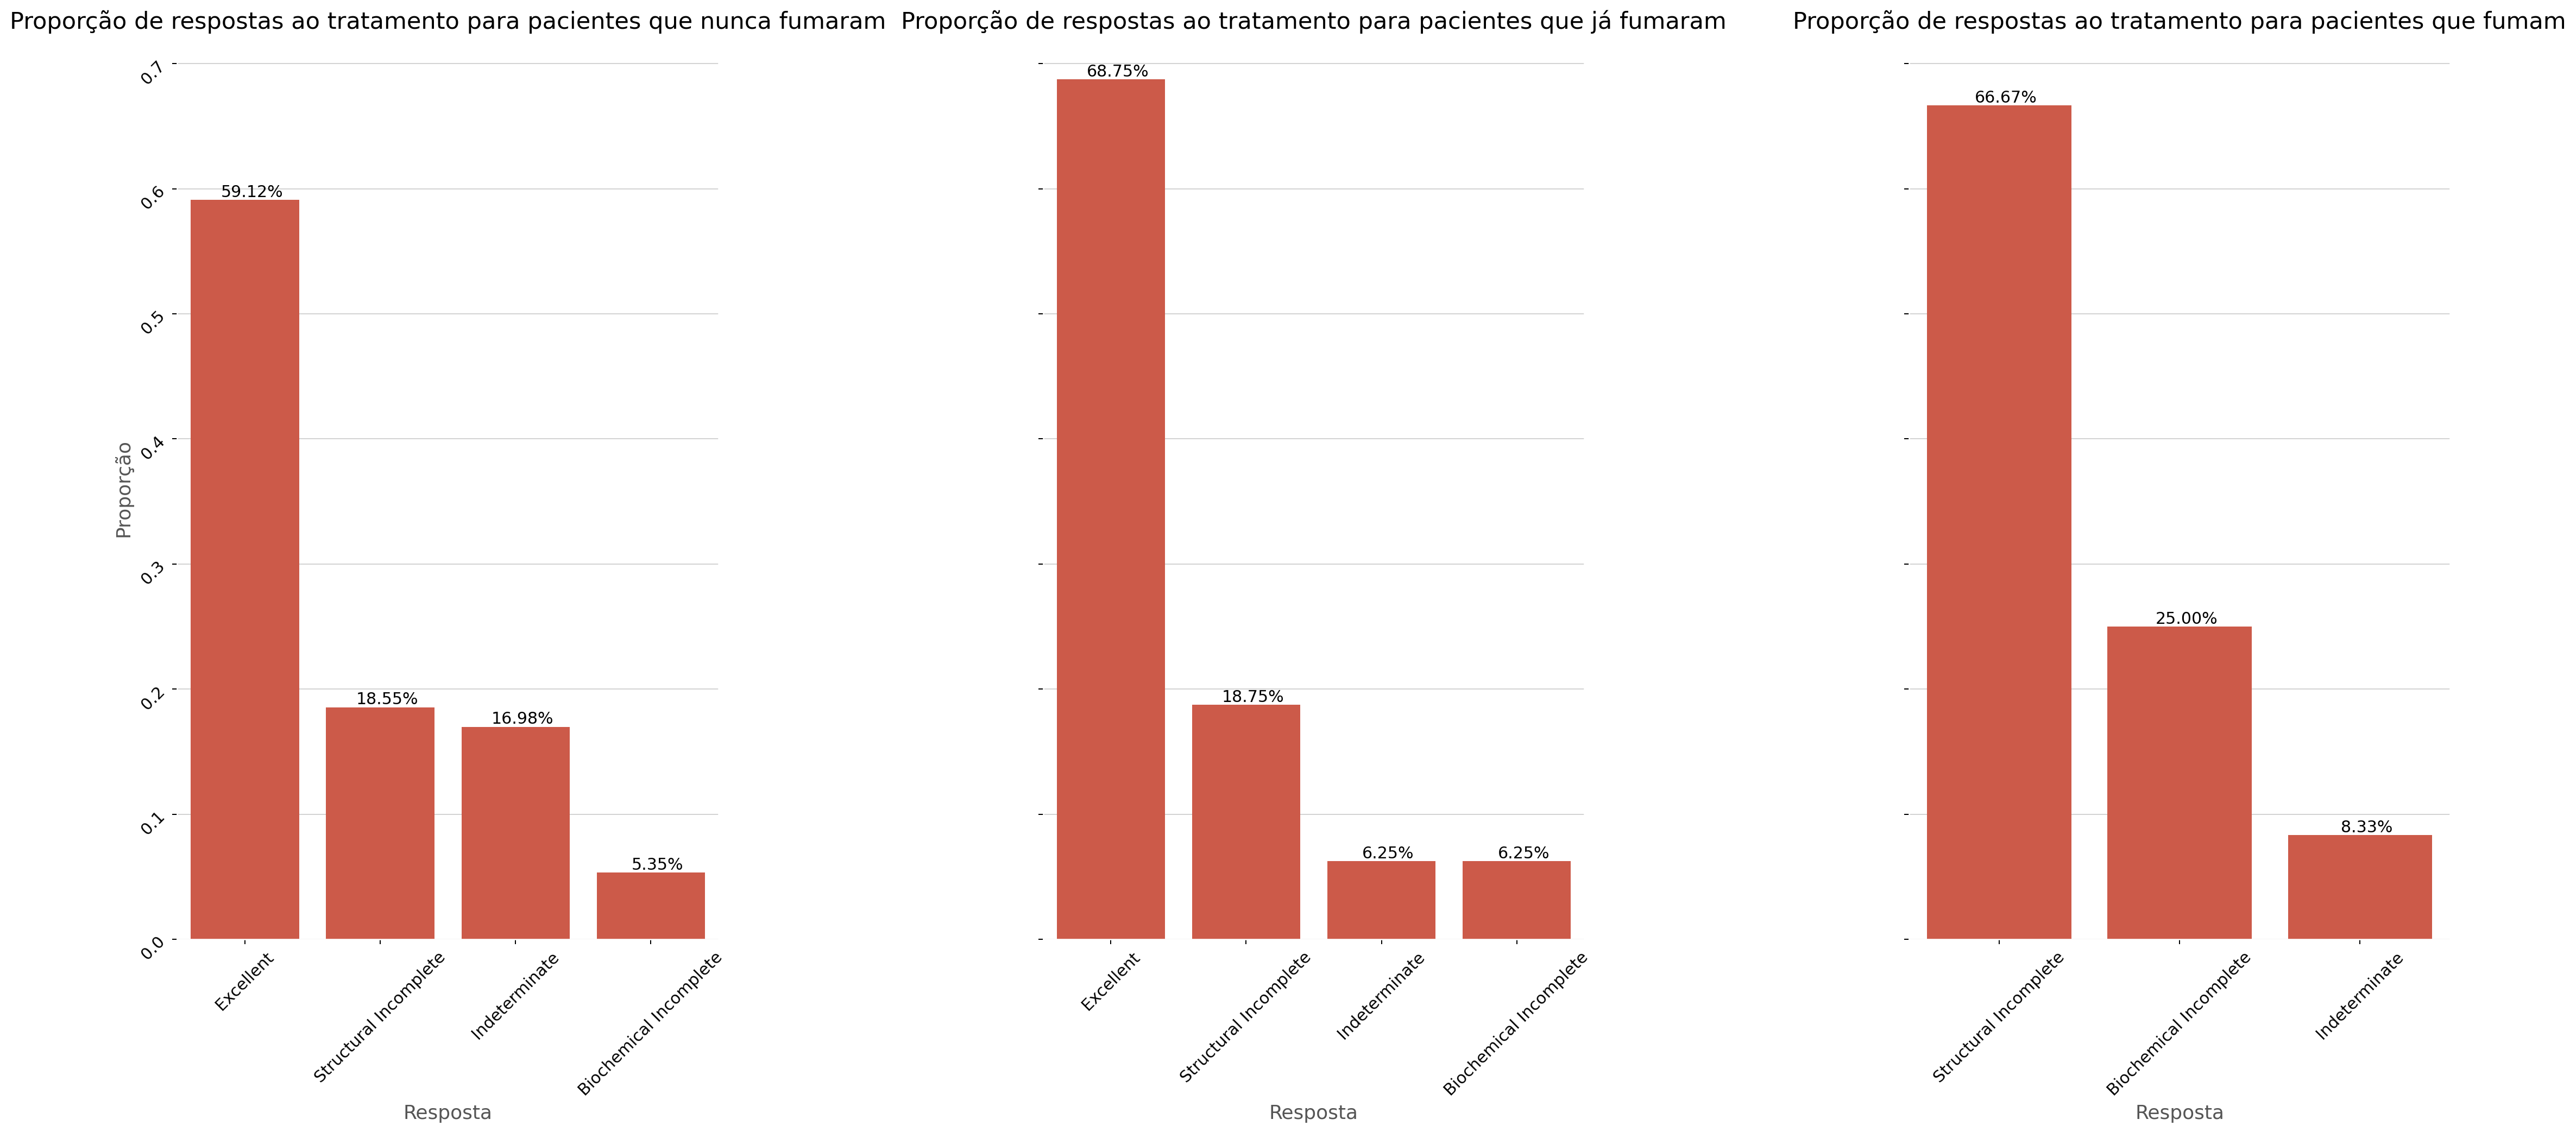

In [32]:
# Proporção das repostas ao tratamento para cada grupo em histórico de tabagismo
nunca_fumaram_resp_prop = nunca_fumaram["Response"].value_counts(normalize=True).reset_index()
ja_fumaram_resp_prop = ja_fumaram["Response"].value_counts(normalize=True).reset_index()
fumantes_resp_prop = fumantes["Response"].value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize=(30,12), ncols=3, sharey=True)
plt.subplots_adjust(wspace=0.6)

sns.barplot(data=nunca_fumaram_resp_prop, x="Response", y="proportion", ax=ax[0])
ax[0].set_title("Proporção de respostas ao tratamento para pacientes que nunca fumaram")
ax[0].set_xlabel("Resposta")
ax[0].set_ylabel("Proporção")
ax[0].tick_params(rotation=45)

sns.barplot(data=ja_fumaram_resp_prop, x="Response", y="proportion", ax=ax[1])
ax[1].set_title("Proporção de respostas ao tratamento para pacientes que já fumaram")
ax[1].set_xlabel("Resposta")
ax[1].tick_params(rotation=45)


sns.barplot(data=fumantes_resp_prop, x="Response", y="proportion", ax=ax[2])
ax[2].set_title("Proporção de respostas ao tratamento para pacientes que fumam")
ax[2].set_xlabel("Resposta")
ax[2].tick_params(rotation=45)


set_annotate(fig, porcentages=True)

plt.show()

##### Observações
<ul> 
    <li>Tanto no grupo de pessoas que nunca tiveram contato com cigarro, tanto no grupo de pessoas que já experimentaram, a grande maioria teve respostas excelentes ao tratamento. Sendo que no grupo de fumantes não há registros de respostas positivas</li>
    <li>As amostras de pessoas que já fumaram e de fumantes são pequenas, por isso a análise gráfica não basta para apontar uma relação significativa entre fumar e uma má resposta ao tratamento. Assim como pontuado nas análises que envolviam faixas de idade, a não ocorrência de boas respostas nos fumantes pode ocorrer justamente devido a essa pouca quantidade de amostras</li>  
    
</ul>

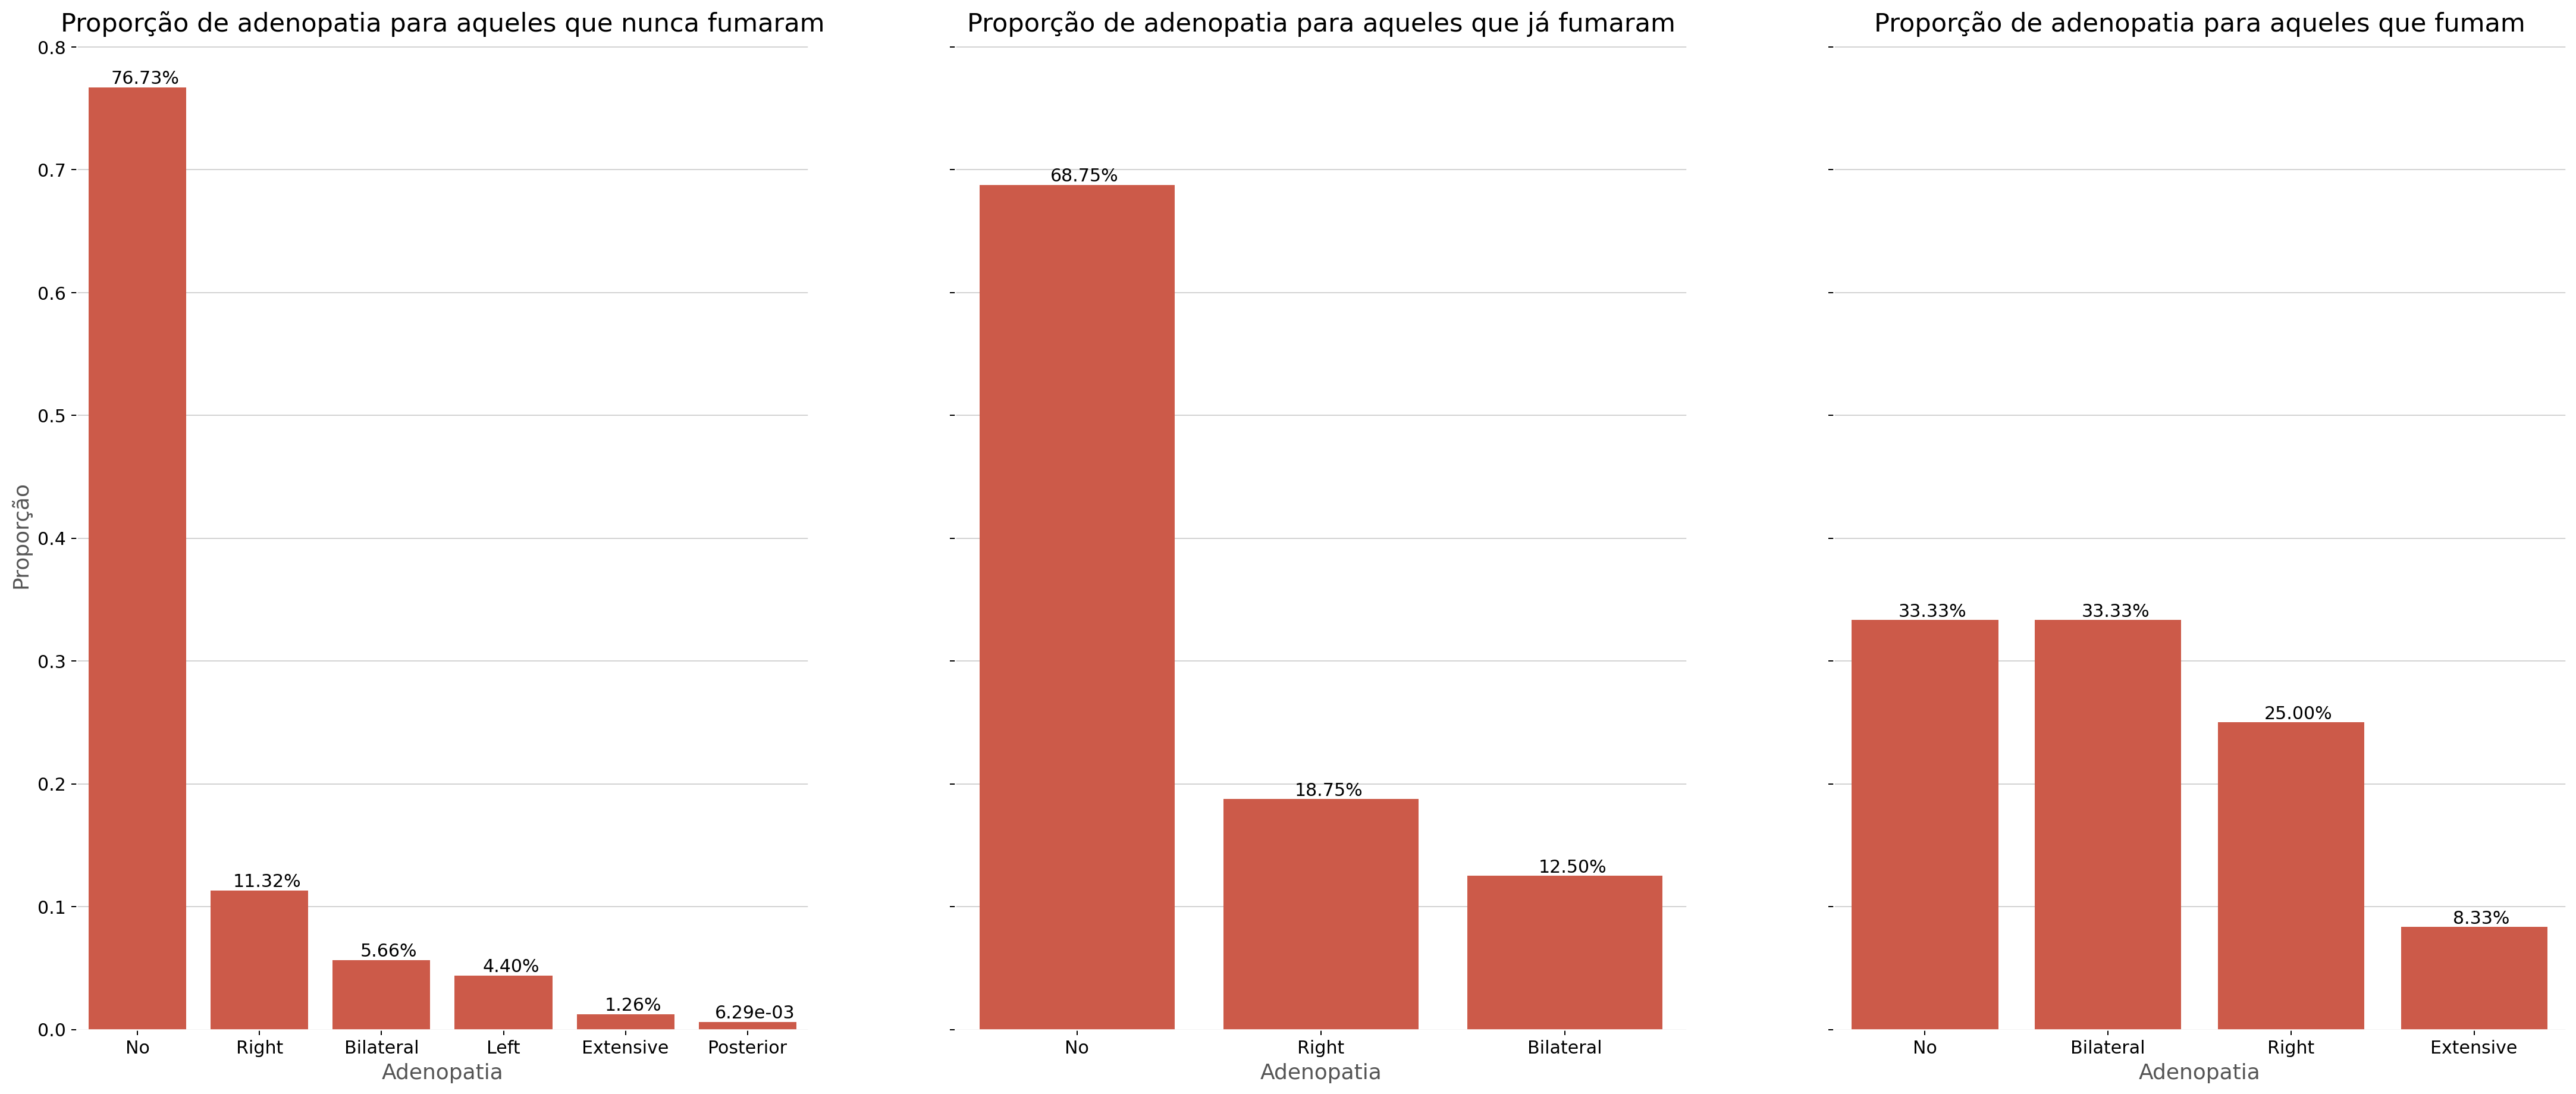

In [33]:
nunca_fumaram_resp_prop = nunca_fumaram["Adenopathy"].value_counts(normalize=True).reset_index()
ja_fumaram_resp_prop = ja_fumaram["Adenopathy"].value_counts(normalize=True).reset_index()
fumantes_resp_prop = fumantes["Adenopathy"].value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize=(30,12), ncols=3, sharey=True)

sns.barplot(data=nunca_fumaram_resp_prop, x="Adenopathy", y="proportion", ax=ax[0])
ax[0].set_title("Proporção de adenopatia para aqueles que nunca fumaram")
ax[0].set_xlabel("Adenopatia")
ax[0].set_ylabel("Proporção")

sns.barplot(data=ja_fumaram_resp_prop, x="Adenopathy", y="proportion", ax=ax[1])
ax[1].set_title("Proporção de adenopatia para aqueles que já fumaram")
ax[1].set_xlabel("Adenopatia")

sns.barplot(data=fumantes_resp_prop, x="Adenopathy", y="proportion", ax=ax[2])
ax[2].set_title("Proporção de adenopatia para aqueles que fumam")
ax[2].set_xlabel("Adenopatia")
set_annotate(fig, porcentages=True)

plt.show()


##### Observações
<ul> 
    <li>Pouco mais de 76% daqueles que nunca fumaram não possuem linfonodos aumentados na região do pescoço</li>  
    <li>Curiosamente os raríssimos casos de linfonodos aumentados na região posterior estão todos concentrados no grupo dos pacientes que nunca fumaram</li>
    <li>O grupo dos fumantes é o único que a maior parte apresentou adenopatia.</li>
    
</ul>

### Interação da radioterapia com a resposta ao tratamento segmentada por faixa de idade

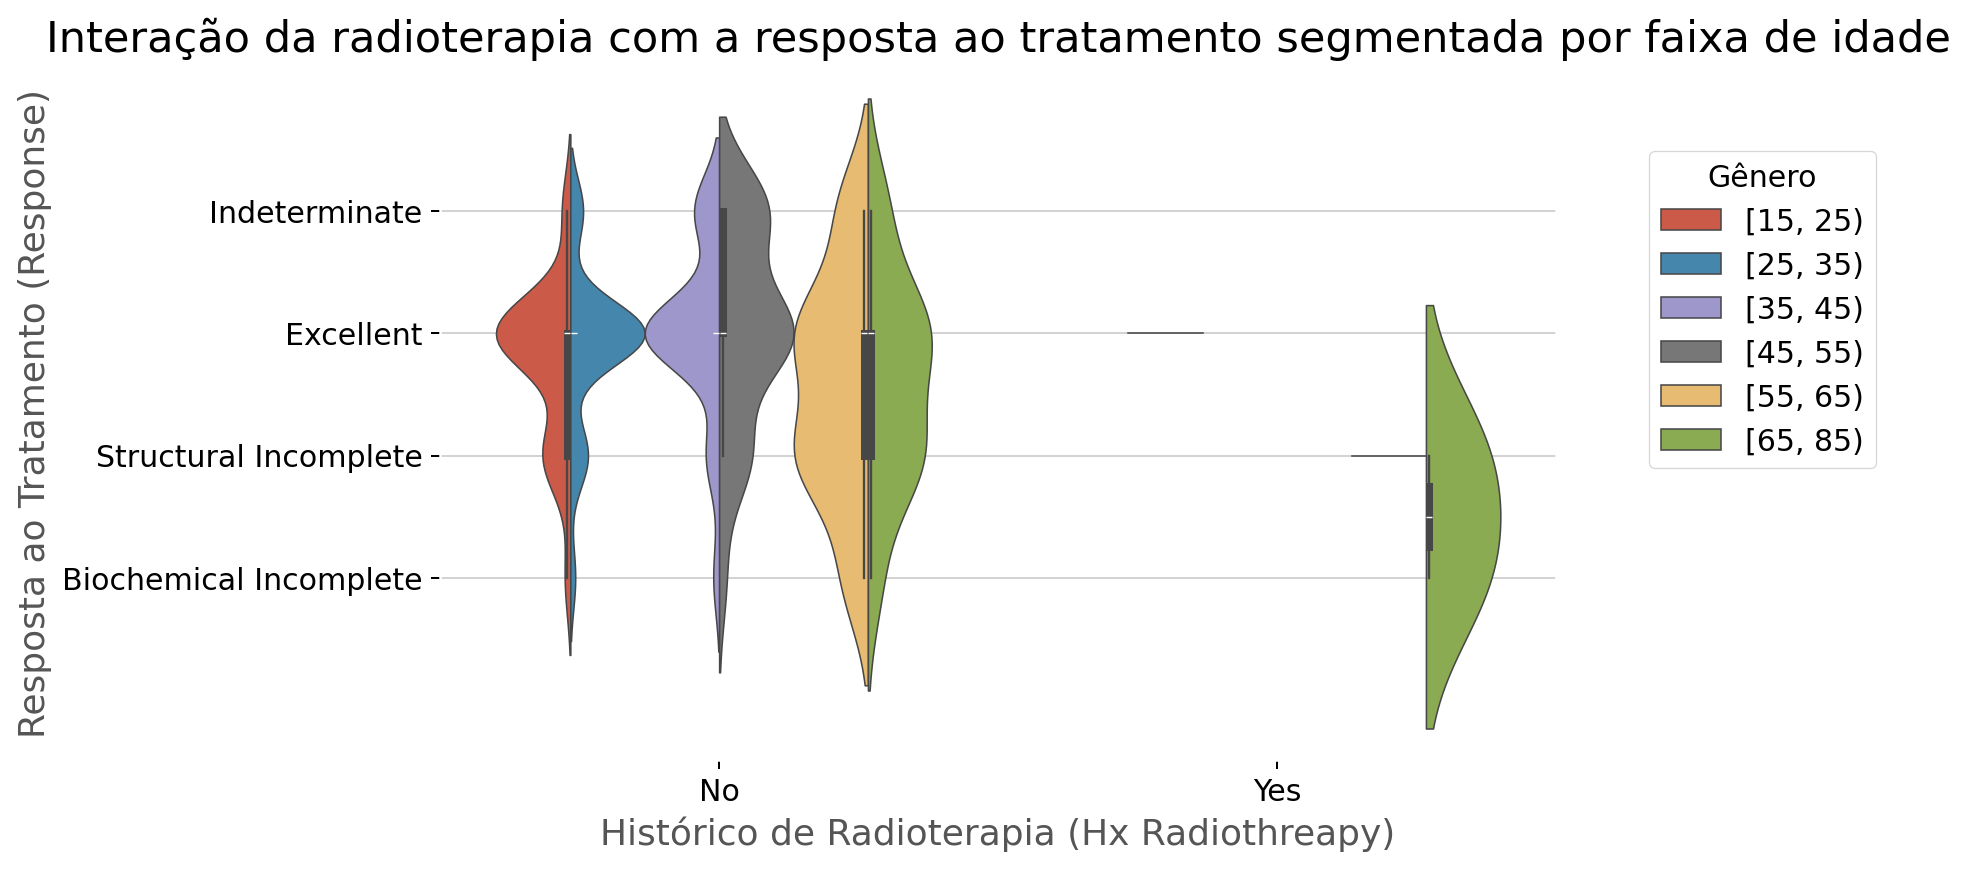

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(x='Hx Radiothreapy', y='Response', hue="Age_bin", data=tireoide, split=True, ax=ax)
plt.title("Interação da radioterapia com a resposta ao tratamento segmentada por faixa de idade")
plt.xlabel("Histórico de Radioterapia (Hx Radiothreapy)")
plt.ylabel("Resposta ao Tratamento (Response)" )

plt.legend(title='Gênero',  bbox_to_anchor=(1.3, 0.9))
plt.show()

##### Observações
<ul> 
    <li>A maior parte das pessoas com idade até os 44 tiveram uma excelente resposta ao tratamento</li>  
    <li>Acima dos 45 anos, os pacientes têm maior incidência de respostas negativas e incompletas </li>
    <li>Pouquíssimos pacientes haviam feito radioterapia previamente, o que impossibilita qualquer apontamento relevante</li>
</ul>

### Relação entre classificações T, N, M e resposta ao tratamento

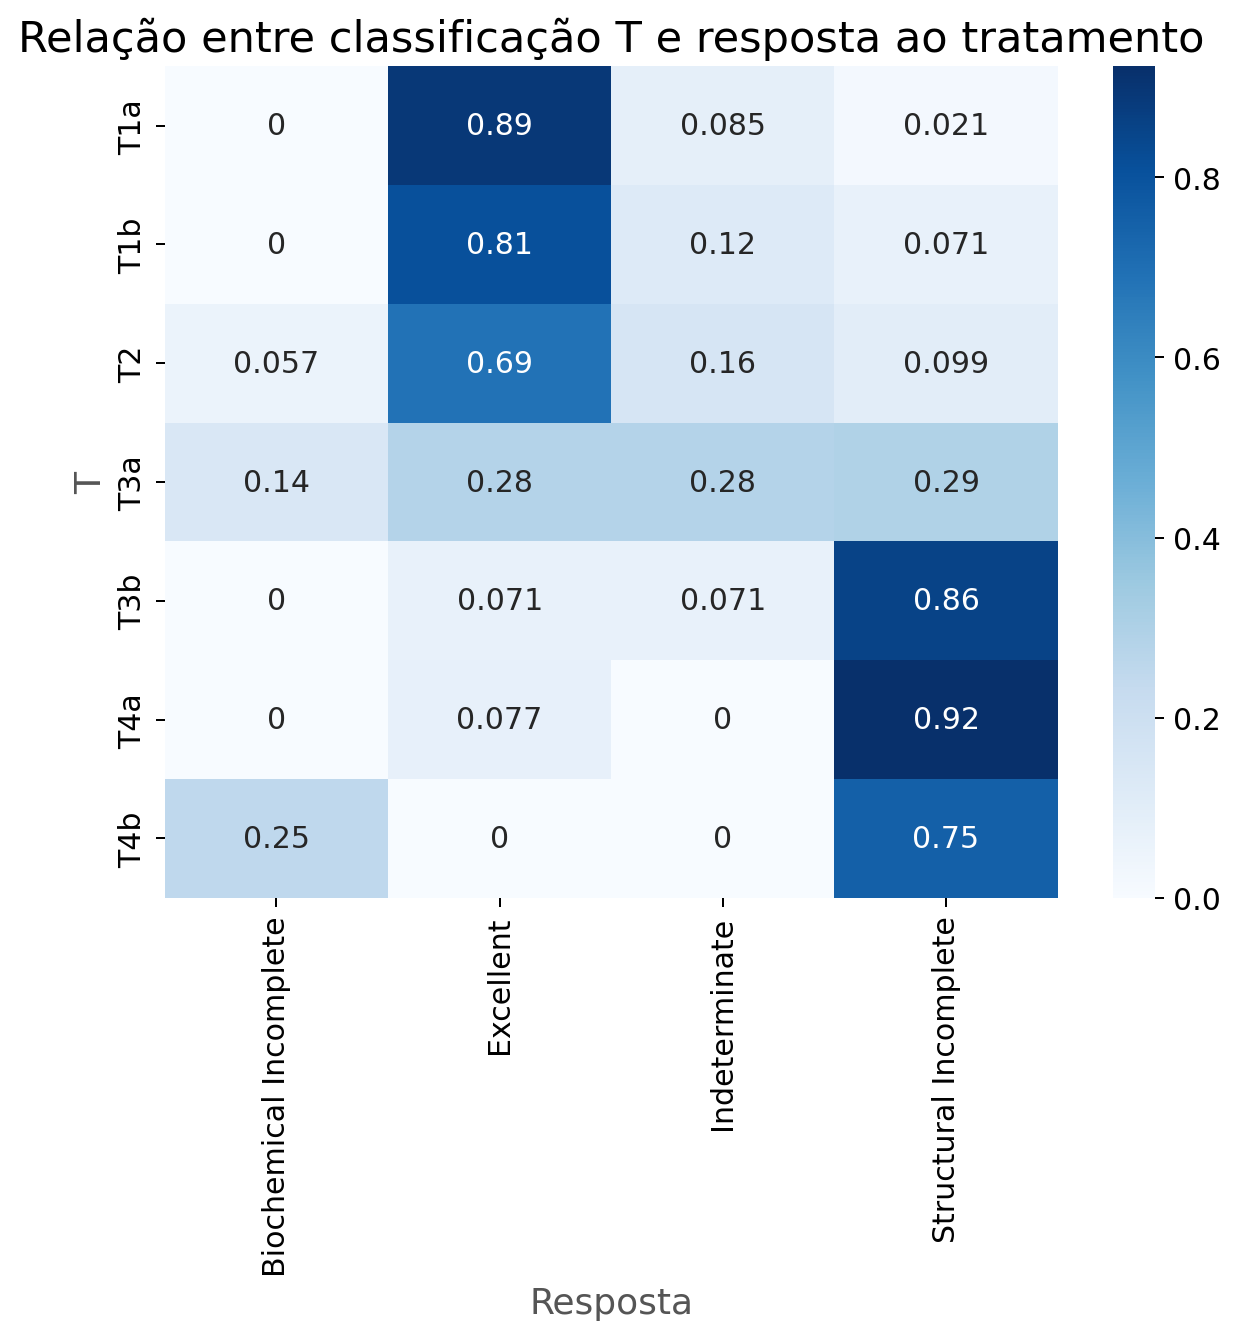

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(tireoide["T"], tireoide['Response'], normalize="index"), annot=True, cmap="Blues", ax=ax)
ax.set_title("Relação entre classificação T e resposta ao tratamento")
ax.set_xlabel("Resposta")

plt.show()

##### Observações
<ul> 
    <li>Há uma relação muito forte entre as excelentes respostas ao tratamento e as classificações T1, uma relação forte para classificação T2 e uma relação fraca para T3a</li>
    <li>Há uma relação muito forte entre as respostas estruturalmente incompletas e as classificações T3b e T4 e uma fraca relação para T3a</li>  
    <li>Há uma fraca relação entre as respostas bioquimicamente incompletas e a classificação T4b</li>
</ul>

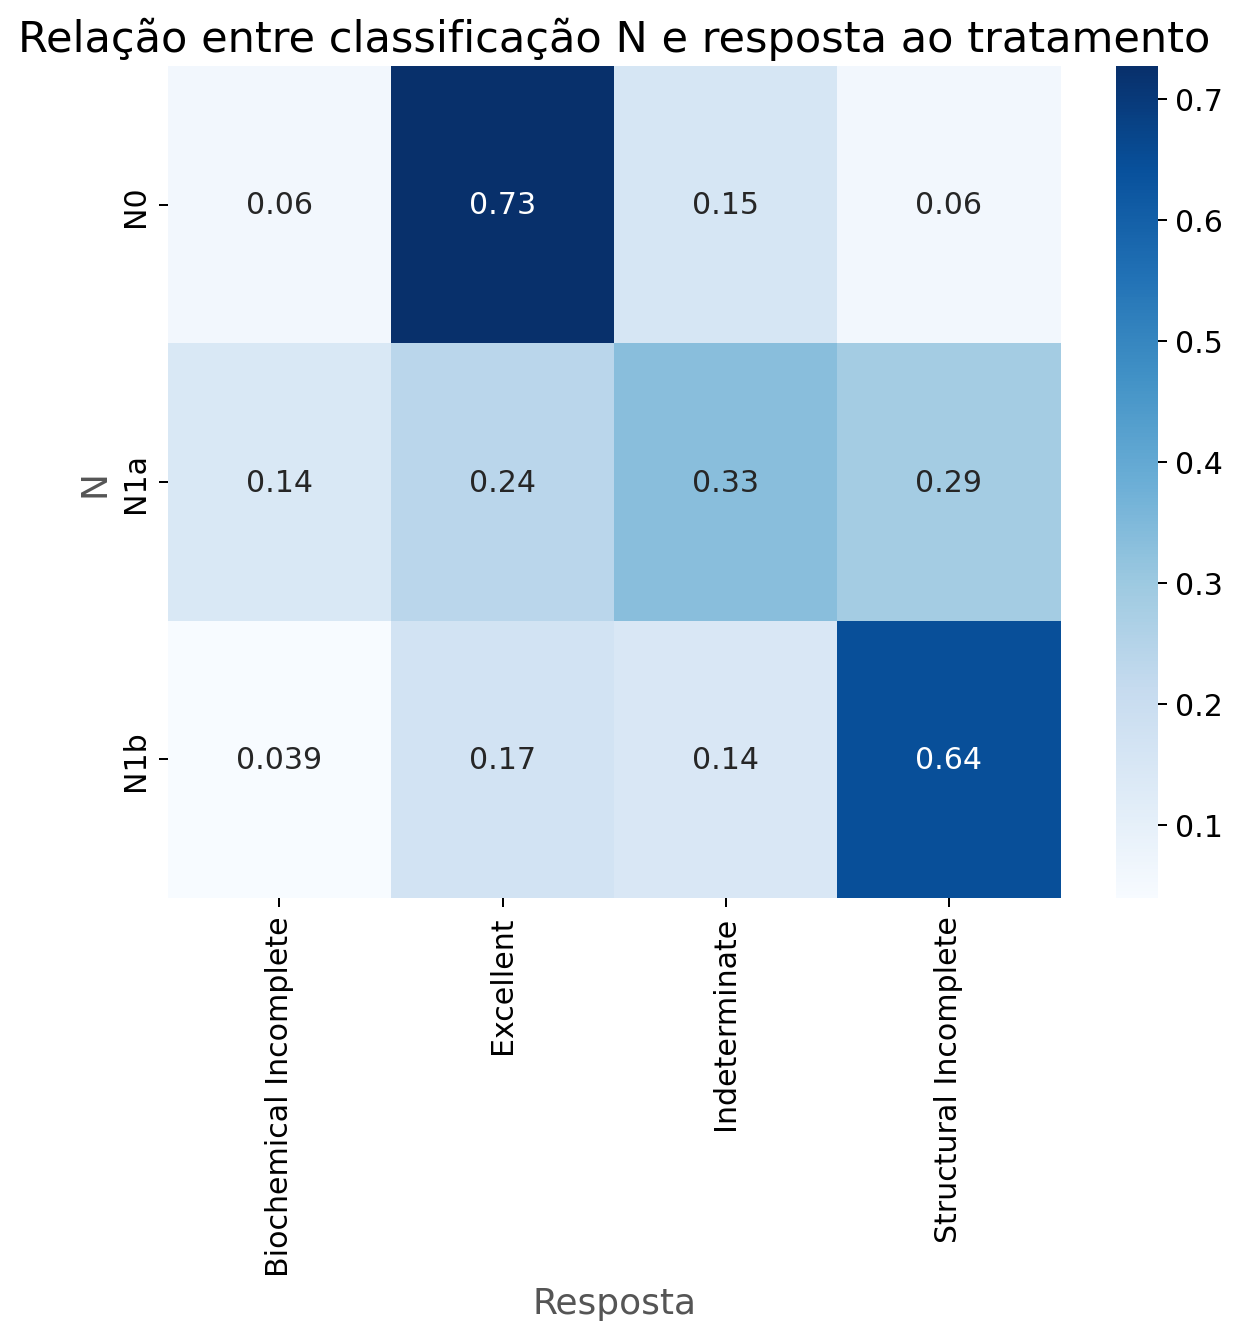

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(tireoide["N"], tireoide["Response"], normalize="index"), annot=True, cmap="Blues", ax=ax)
ax.set_title("Relação entre classificação N e resposta ao tratamento")
ax.set_xlabel("Resposta")

plt.show()

##### Observações
<ul> 
    <li>Há uma relação muito forte entre as excelentes respostas ao tratamento e a classificação N0</li>
    <li>Há uma relação forte entre as respostas estruturalmente incompletas e a classificação N1b</li>  
    <li>Há uma relação moderada entre as respostas indeterminadas e a classificação N1a, o que pode indicar que essa classificação nodal é difícil de se avaliar</li>
    
</ul>

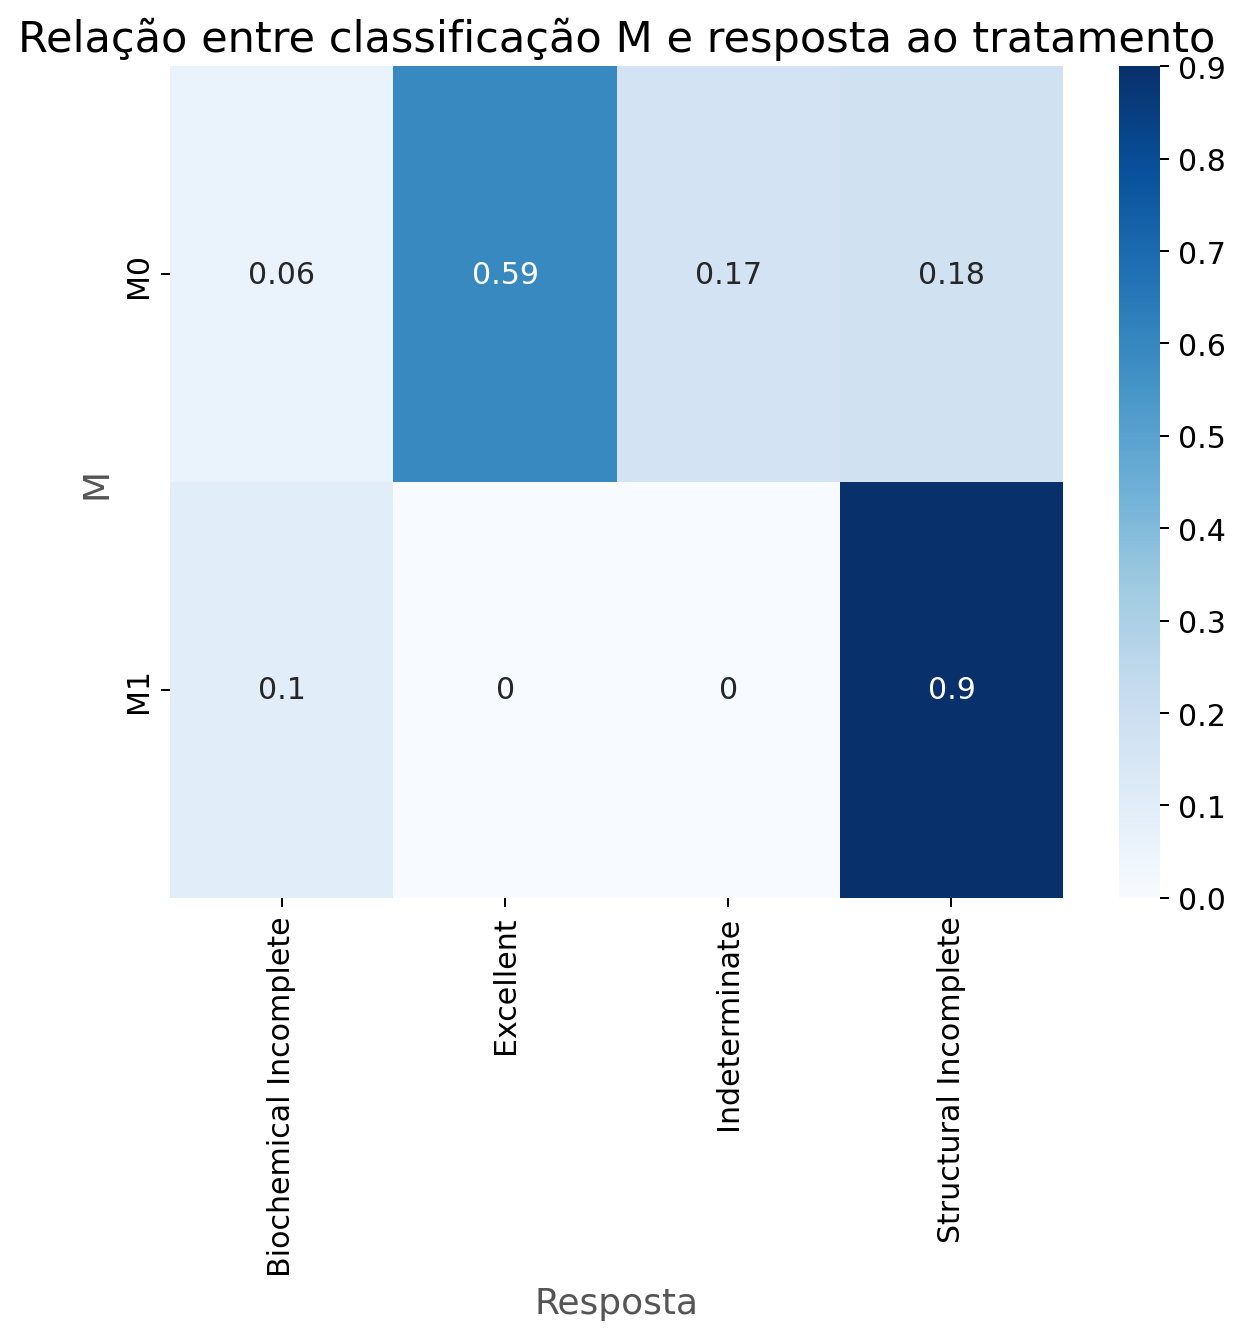

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(tireoide["M"], tireoide["Response"], normalize="index"), annot=True, cmap="Blues", ax=ax)
ax.set_title("Relação entre classificação M e resposta ao tratamento")
ax.set_xlabel("Resposta")

plt.show()

##### Observações
<ul> 
    <li>Há uma relação muito forte entre as respostas estruturalmente incompletas e a classificação M1</li>
    <li>Há uma forte relação entre as respostas excelentes ao tratamento e a classificação M0</li>  

    
</ul>

### Relação entre faixa de idade e resposta ao tratamento

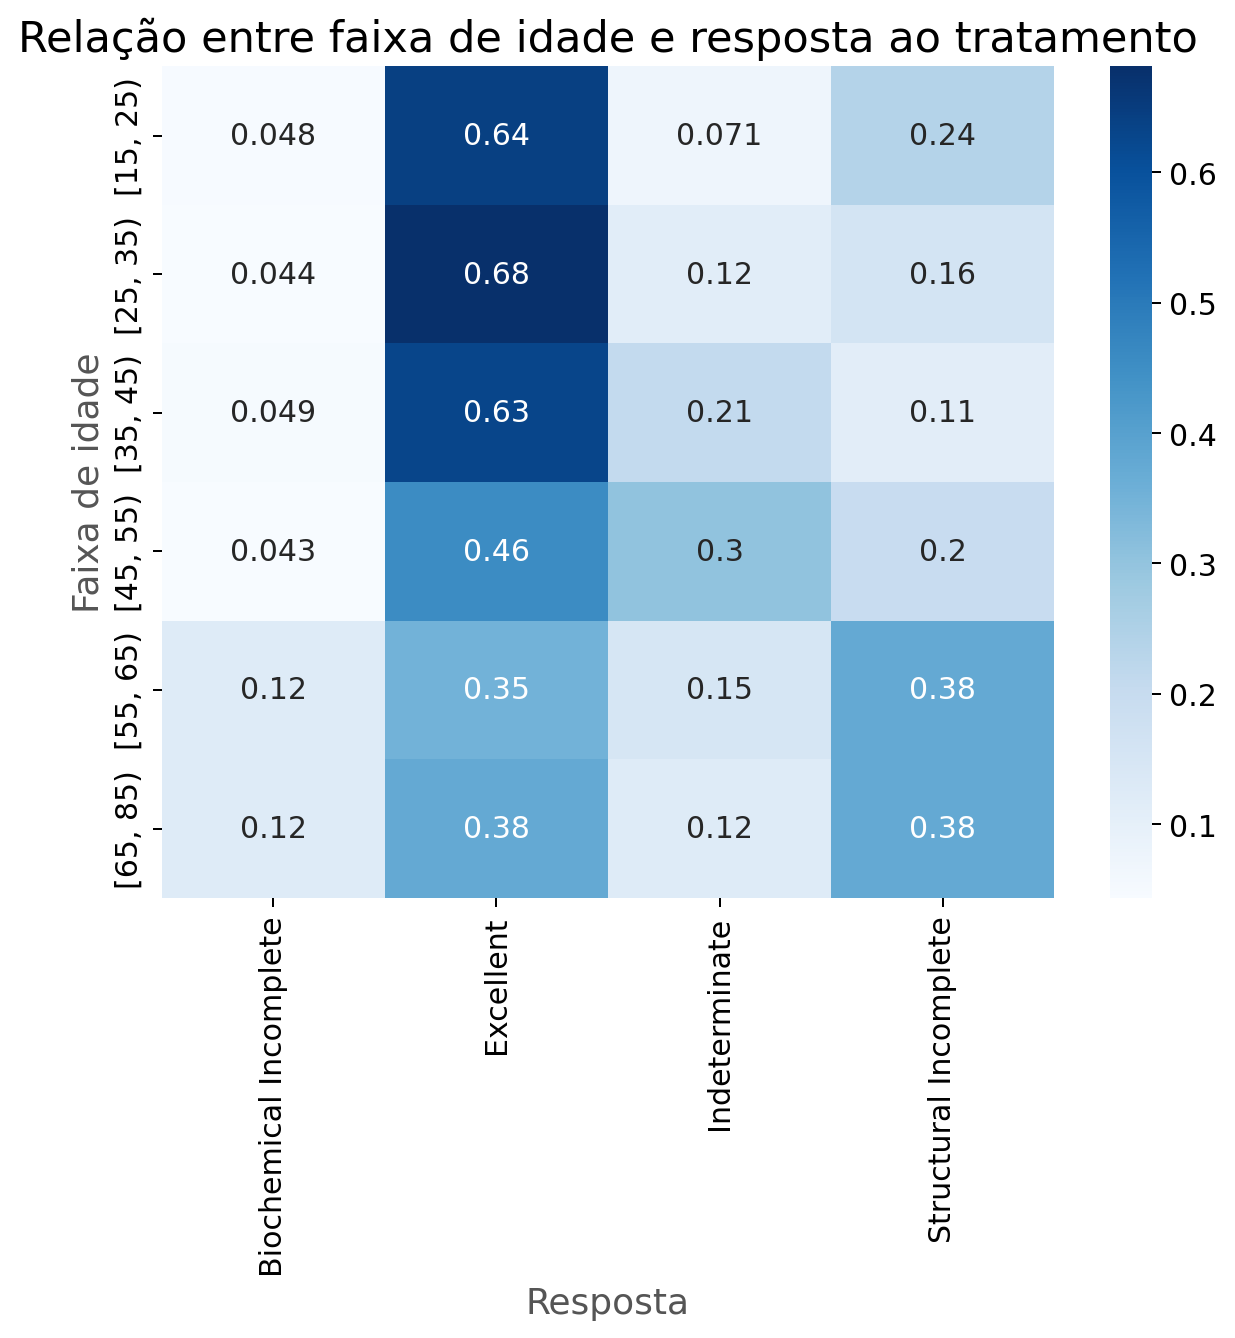

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(tireoide["Age_bin"], tireoide["Response"], normalize="index"), annot=True, cmap="Blues", ax=ax)
ax.set_title("Relação entre faixa de idade e resposta ao tratamento")
ax.set_xlabel("Resposta")
ax.set_ylabel("Faixa de idade")

plt.show()

##### Observações
<ul> 
    <li>Há uma relação forte entre as excelentes respostas ao tratamento e a faixa de idade até os 44 anos, com faixas de idade mais avançadas possuindo uma relação moderada com essa mesma resposta ao tratamento</li>
    <li>A uma relação moderada entre as respostas estruturalmente incompletas e  as faixas acima dos 54 anos</li>  

    
</ul>

### Relação entre faixa de idade e recorrência do câncer

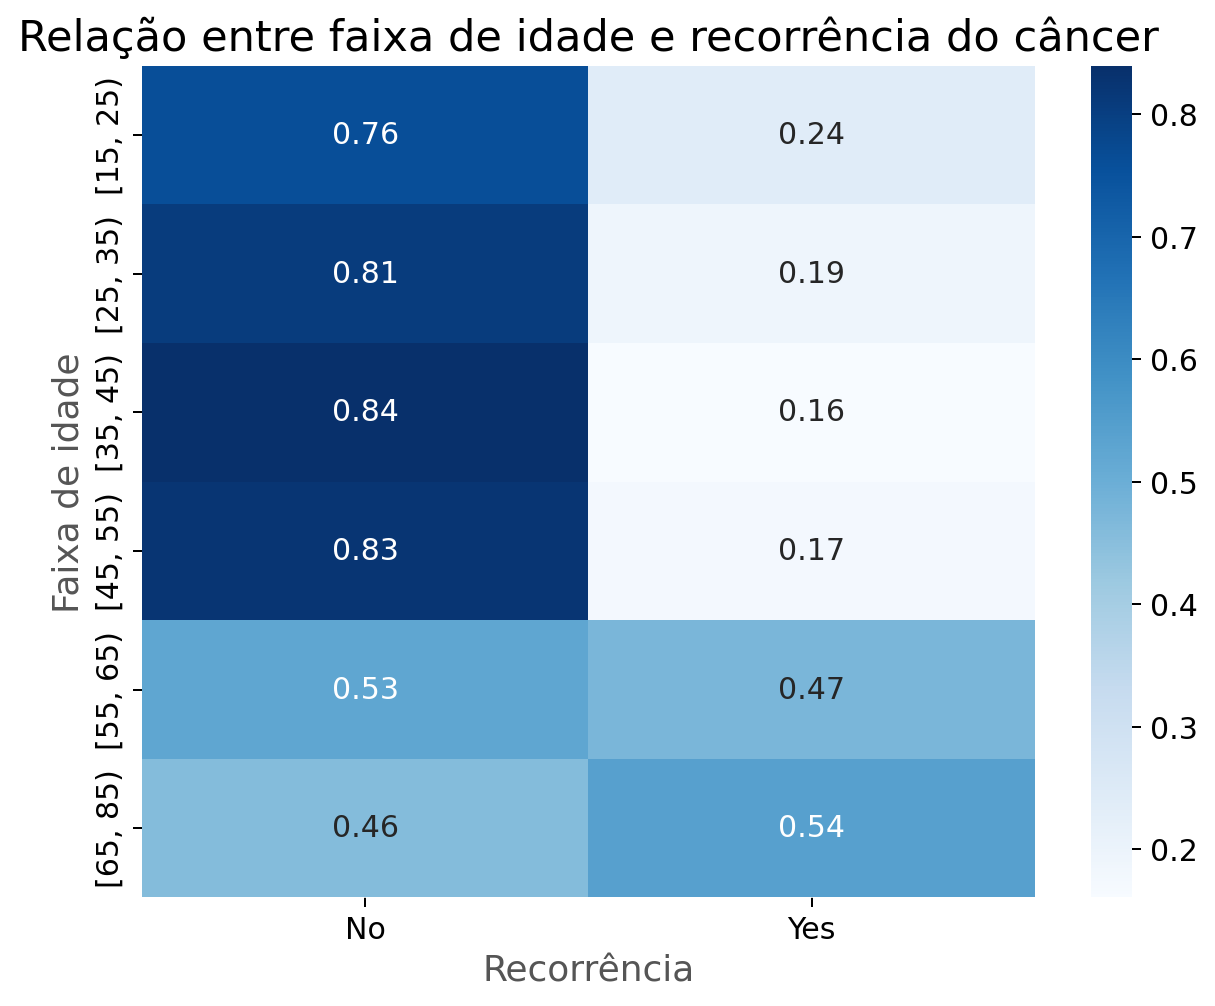

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(tireoide["Age_bin"], tireoide["Recurred"], normalize="index"), annot=True, cmap="Blues", ax=ax)
ax.set_title("Relação entre faixa de idade e recorrência do câncer")
ax.set_xlabel("Recorrência")
ax.set_ylabel("Faixa de idade")

plt.show()

##### Observações
<ul> 
    <li>Há uma relação muito forte entre os casos de não recorrência do câncer e as faixas de idade abaixo dos 55 anos, com significativa queda da relação nos intervalos seguintes, sendo a faixa de idade até os 64 anos possuindo relação forte e até os 84 uma relação moderada com esse mesmo caso</li>
    <li>As faixas de idade acima dos 55 anos possuem relação moderada com os casos de recorrência</li>  

    
</ul>

### Relação entre faixa de idade e adenopatia

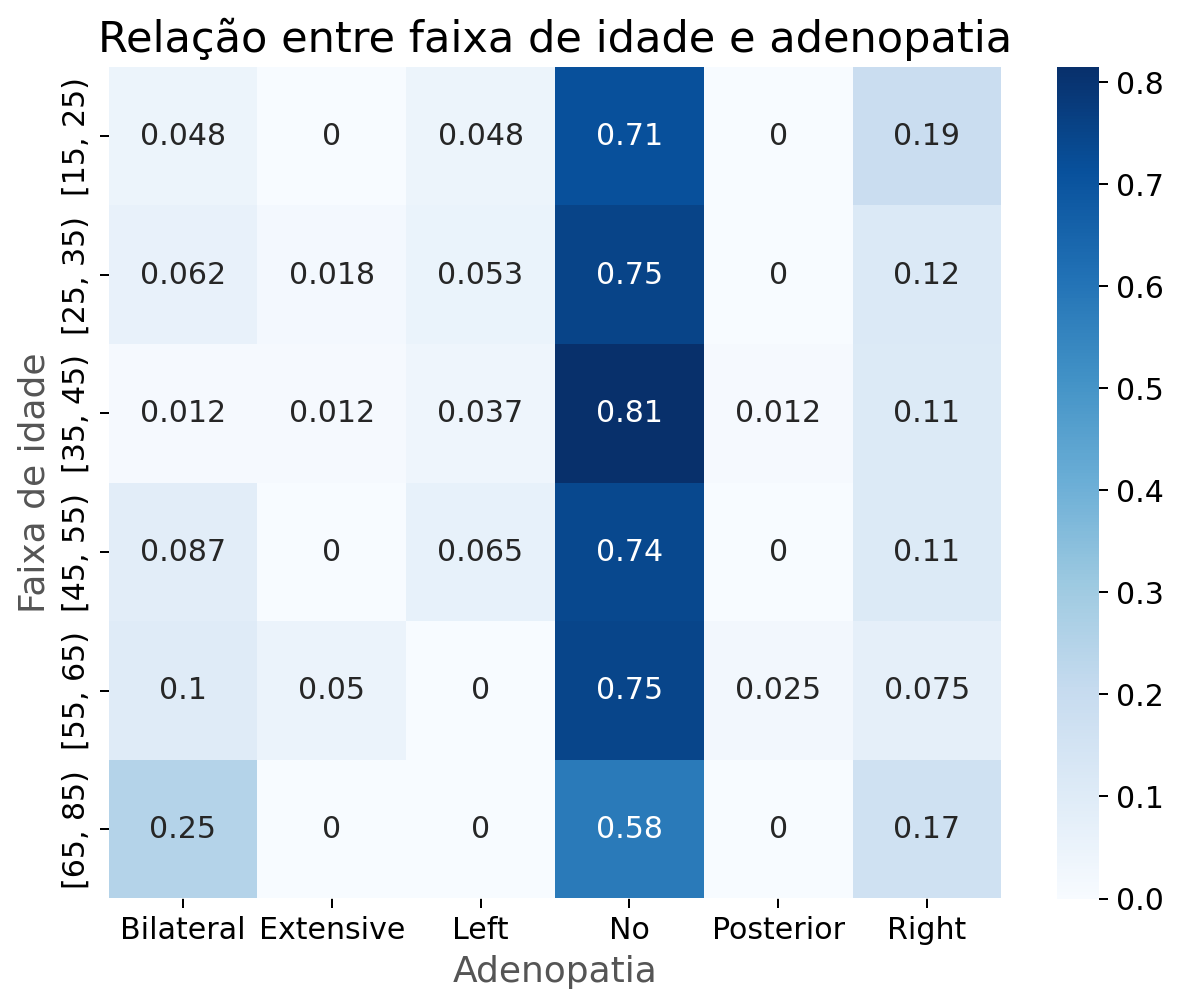

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(tireoide["Age_bin"], tireoide["Adenopathy"], normalize="index"), annot=True, cmap="Blues", ax=ax)
ax.set_title("Relação entre faixa de idade e adenopatia")
ax.set_xlabel("Adenopatia")
ax.set_ylabel("Faixa de idade")

plt.show()

##### Observações
<ul> 
    <li>As relações entre as faixas de idade e a ausência de linfonodos aumentados permanecem muito fortes até os 64 anos, após isso ela se torna uma relação forte</li>


    
</ul>

### Relação entre risco e resposta ao tratamento

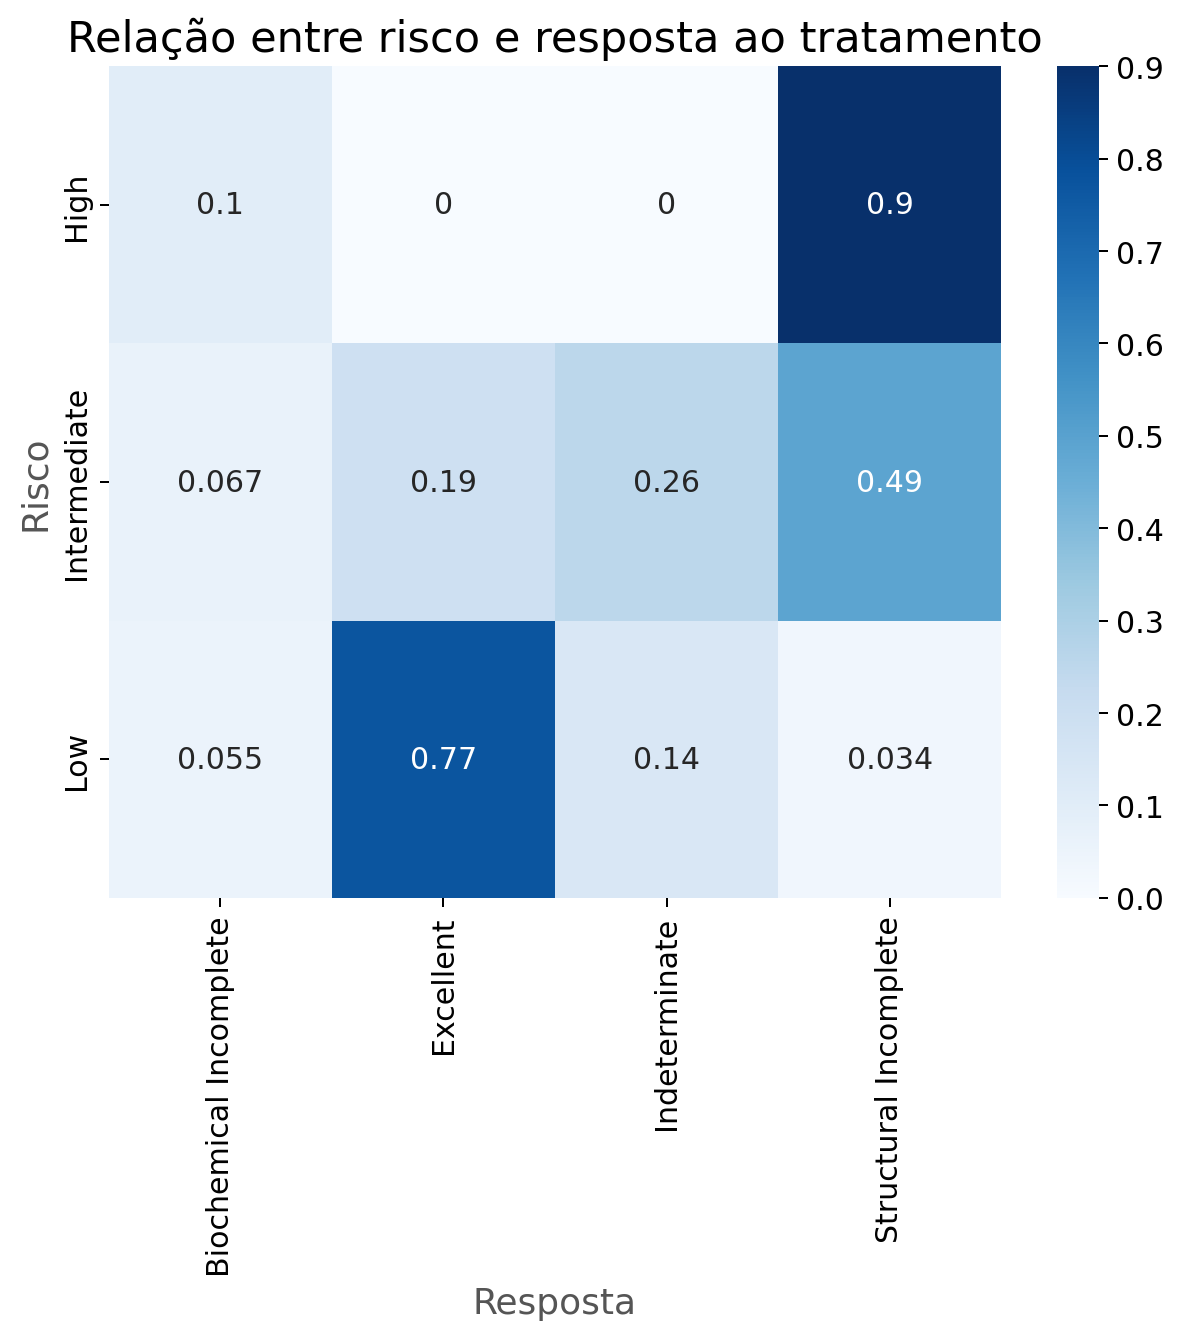

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(tireoide["Risk"], tireoide["Response"], normalize="index"), annot=True, cmap="Blues", ax=ax)
ax.set_title("Relação entre risco e resposta ao tratamento")
ax.set_xlabel("Resposta")
ax.set_ylabel("Risco")

plt.show()


##### Observações
<ul> 
    <li>Há uma associação muito forte entre a resposta estruturalmente incompleta e o alto risco</li>
    <li>Há uma relação muito forte entre a reposta excelente ao tratamento e ao baixo risco</li>  
    <li>Há uma relação moderada entre a resposta estruturalmente incompleta e ao risco intermediário </li>    
    
</ul>

# Principais conclusões da Análise Exploratória 

- Pacientes do sexo feminino ocupam uma parte muito maior dos dados. Isso pode representar uma possível disparidade de  gênero nas condições de saúde da tireoide ou, alternativamente, pode refletir padrões de busca de assistência médica - mais frequentes entre as mulheres.
- Somente 8% dos pacientes possuem histórico de tabagismo (são fumantes ou já fumaram).
- Quase 30% dos pacientes tiveram evidências físicas ou químicas de que o câncer não havia sido eliminado completamente.
- "Papilary" é, de longe, o tipo de câncer de tireoide que mais aparece.
- Aproximadamente 65,5% dos casos de câncer são limitados a um único local.
- A maioria dos casos são de baixo risco.
- Cerca de 28,2% dos pacientes tiveram recorrência de câncer. 
- A proporção de pessoas que tiveram recorrência do câncer é maior nas regiões acima dos 50 anos.
Há uma relação muito forte entre as excelentes respostas ao tratamento e a faixa de idade até os 44 anos, com faixas de idade mais avançadas possuindo uma relação moderada com essa mesma resposta ao tratamento.
- As faixas de idade acima dos 55 anos possuem relação moderada com os casos de recorrência.
Semelhante à recorrência, o risco intermediário e o risco avançado crescem significativamente em faixas acima dos 55 anos, onde em faixas acima dos 65 anos os grupos que tiveram baixo risco são minoria.
- Até a faixa dos 44 anos, mais da metade das respostas ao tratamento foram excelentes, com crescimento de respostas negativas e indeterminadas após essa faixa, com destaque para faixas acima dos 55 anos.
- Há uma relação muito forte entre as excelentes respostas ao tratamento e as classificações T1, uma relação forte para classificação T2 e uma relação fraca para T3a.
- Há uma relação muito forte entre as respostas estruturalmente incompletas e a classificação M1.
- Há uma relação muito forte entre as respostas excelentes ao tratamento e a classificação N0.

# Testes de Hipótese

Os testes serão executados seguindo essa ordem de passos:

<ol>
    <li>Definição de hipótese nula e alternativa</li>
    <li>Definição do nível de significância</li>
    <li>Definição do teste a ser aplicado</li>
    <li>Calcular a estatística do teste e o p-valor</li>
</ol>

As hipóteses a serem testadas são:

- Há uma relação significativa entre a faixa etária e resposta ao tratamento ?

- As idades no grupo que teve recorrência do câncer são significativamente maiores que as do grupo que não teve?

- Há uma relação significativa entre tabagismo e recorrência do câncer 

- As idades nos grupos de risco mais altos tendem a ser maiores do que nos grupos de riscos mais baixos?

- Há uma relação significativa entre a adenopatia e o risco do câncer?


### Há uma relação estatisticamente significativa entre a focalidade e o risco do câncer?

Definindo hipótese nula e alternativa:

- H0: Não há uma relação significativa entre a focalidade e o risco
- H1: Há uma relação significativa entre a focalidade e o risco

Definindo nível de significância
- α = 0.05

Definindo o teste
- Como esse teste envolve duas variáveis categóricas optarei por usar o Teste qui-quadrado, verificando os valores esperados após rodar o teste para avaliar se o Teste exato de Fisher será mais adequado

In [42]:
contingency_table = pd.crosstab(tireoide["Focality"], tireoide["Risk"])

print("Tabela de Contingência:")
print(contingency_table)

# Realizando o teste chi-quadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nEstatística Qui-Quadrado: {chi2}")
print(f"P-valor: {p_value}")
print(f"Graus de Liberdade: {dof}")
print(f"\nValores Esperados:\n{expected}")

# Interpretação do p-valor
if (expected < 5).any():
    print("\nPelo menos uma das frequências esperadas é menor que 5. O Teste de Fisher pode ser mais adequado")
else:
    if p_value < 0.05:
        print("\nHá uma relação significativa entre a focalidade e o risco")
    else:
        print("\nNão há uma relação significativa entre a focalidade e o risco")

Tabela de Contingência:
Risk         High  Intermediate  Low
Focality                            
Multi-Focal    14            52   45
Uni-Focal       6            38  191

Estatística Qui-Quadrado: 58.81447819258133
P-valor: 1.6927714764758132e-13
Graus de Liberdade: 2

Valores Esperados:
[[  6.41618497  28.87283237  75.71098266]
 [ 13.58381503  61.12716763 160.28901734]]

Há uma relação significativa entre a focalidade e o risco


### As idades nos grupos de risco mais altos tendem a ser maiores do que nos grupos de riscos mais baixos?

Definindo hipótese nula e alternativa:

- H0: As idades no grupo que teve recorrência do câncer não são significativamente maiores que as do grupo que não teve
- H1: As idades no grupo que teve recorrência do câncer são significativamente maiores que as do grupo que não teve

Definindo nível de significância
- α = 0.05

Definindo o teste
- Como esse teste envolve dois grupos independentes que não seguem uma normal(o teste foi feito no início da análise), vou optar por usar o teste Mann-Whitney U

In [43]:
yes_group = tireoide[tireoide['Recurred'] == 'Yes']['Age']
no_group = tireoide[tireoide['Recurred'] == 'No']['Age']

# Realizando o teste de Mann-Whitney U com a hipótese de que as idades no grupo "Yes" são maiores que no grupo "No"
stat, p_value = mannwhitneyu(yes_group, no_group, alternative="greater")

print(f"Estatística U: {stat}")
print(f"P-valor: {p_value}")

# Interpretação do p-valor
if p_value < 0.05:
    print("\nAs idades no grupo que teve recorrência do câncer são significativamente maiores que as do grupo que não teve")
else:
    print("\nAs idades no grupo que teve recorrência do câncer não são significativamente maiores que as do grupo que não teve")


Estatística U: 13489.0
P-valor: 0.0013836111876036727

As idades no grupo que teve recorrência do câncer são significativamente maiores que as do grupo que não teve


### Há realmente uma relação estatisticamente significativa entre o tabagismo e a recorrência do câncer?

Definindo hipótese nula e alternativa:

- H0: Não há uma relação significativa entre o tabagismo e a recorrência do câncer
- H1: Há uma relação significativa entre o tabagismo e a recorrência do câncer

Definindo nível de significância
- α = 0.05

Definindo o teste
- Como esse teste envolve duas variáveis categóricas optarei por usar o Teste qui-quadrado, verificando os valores esperados após rodar o teste para avaliar se o Teste exato de Fisher será mais adequado

In [44]:
contingency_table = pd.crosstab(tireoide["Smoking"], tireoide["Recurred"])

print("Tabela de Contingência:")
print(contingency_table)

# Realizando o teste qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nEstatística Qui-Quadrado: {chi2}")
print(f"P-valor: {p_value}")
print(f"Graus de Liberdade: {dof}")
print(f"\nValores Esperados:\n{expected}")

# Interpretação do p-valor
if (expected < 5).any():
    print("\nPelo menos uma das frequências esperadas é menor que 5. O Teste de Fisher pode ser mais adequado")
else:
    if p_value < 0.05:
        print("\nHá uma relação significativa entre o tabagismo e a recorrência do câncer")
    else:
        print("\nNão há uma relação significativa entre o tabagismo e a recorrência do câncer")

Tabela de Contingência:
Recurred   No  Yes
Smoking           
No        259   75
Yes         2   10

Estatística Qui-Quadrado: 19.99824999538898
P-valor: 7.751307128608601e-06
Graus de Liberdade: 1

Valores Esperados:
[[251.94797688  82.05202312]
 [  9.05202312   2.94797688]]

Pelo menos uma das frequências esperadas é menor que 5. O Teste de Fisher pode ser mais adequado


Já que pelo menos uma das frequências esperadas é menor que 5, optarei por aplicar o  Teste de Fisher

In [45]:
# Ativar conversão automática entre pandas e R
pandas2ri.activate()

# Criar a tabela de contingência
contingency_table = pd.crosstab(tireoide["Smoking"], tireoide["Recurred"])

print("Tabela de Contingência:")
print(contingency_table)

# Converter a tabela de contingência para um dataframe do R
r_contingency_table = pandas2ri.py2rpy(contingency_table)

# Executar o teste exato de Fisher no R
fisher_test = ro.r["fisher.test"]
result = fisher_test(r_contingency_table, simulate_p_value=True, B=10000)

# Obter o p-valor
p_value = result.rx2("p.value")[0]

pandas2ri.deactivate()

print(f"\nP-Valor Exato de Fisher: {p_value}")

# Interpretação do p-valor
if p_value < 0.05:
    print("\nHá uma relação significativa entre entre o tabagismo e a recorrência do câncer")
else:
    print("\nNão há uma relação significativa entre o tabagismo e a recorrência do câncer")

Tabela de Contingência:
Recurred   No  Yes
Smoking           
No        259   75
Yes         2   10

P-Valor Exato de Fisher: 2.207612959770567e-05

Há uma relação significativa entre entre o tabagismo e a recorrência do câncer


### As idades nos grupos de risco mais altos tendem a ser maiores do que nos grupos de riscos mais baixos?

Definindo hipótese nula e alternativa:

- H0: Não há uma diferença significativa nas idades entre os grupos de risco
- H1: Há uma diferença significativa nas idades entre pelo menos dois grupos de risco

Definindo nível de significância
- α = 0.05

Definindo o teste
- Como esse teste é não paramétrico e envolve mais de dois grupos, vou optar por usar o Teste de Kurskal-Wallis, verificando após rodar o teste se existe uma diferença significativa entre as idades de pelo menos dois grupos de riscos para aplicar o Teste Post-Hoc visando identificar quais grupos diferem entre si

In [46]:
low_risk = tireoide[tireoide["Risk"] == "Low"]["Age"]
intermediate_risk = tireoide[tireoide["Risk"] == "Intermediate"]["Age"]
high_risk = tireoide[tireoide["Risk"] == "High"]["Age"]


# Realizando o teste de Kruskal-Wallis
stat, p_value = kruskal(low_risk, intermediate_risk, high_risk)

print(f"Estatística H: {stat}")
print(f"P-valor: {p_value}")

# Interpretação do p-valor
if p_value < 0.05:
    print("\nHá uma diferença significativa nas idades entre pelo menos dois grupos de risco")
else:
    print("\nNão há uma diferença significativa nas idades entre os grupos de risco")


Estatística H: 20.597850053372376
P-valor: 3.3669269305127595e-05

Há uma diferença significativa nas idades entre pelo menos dois grupos de risco


Como o Teste de Kruskal-Wallis mostrou que há diferença significativa nas idades entre pelo menos dois grupos de risco, vou aplicar o Teste Post-Hoc para identificar quais grupos específicos diferem entre si

In [47]:
# Realizando o Teste Post-hoc
posthoc_results = sp.posthoc_dunn([low_risk, intermediate_risk, high_risk], p_adjust="bonferroni")

print("Resultados do Teste Post-hoc (p-valores ajustados):")
print(posthoc_results)

Resultados do Teste Post-hoc (p-valores ajustados):
         1         2         3
1  1.00000  0.701620  0.000020
2  0.70162  1.000000  0.000789
3  0.00002  0.000789  1.000000


Interpretação: 
- Comparação Low vs Intermediate: p=0.701620 (não significativo)
- Comparação Low vs High: p=0.000020 (significativo)
- Comparação Intermediate vs High: p=0.000789(significativo)



Os resultados indicam que:
- As idades no grupo de alto risco são significativamente maiores do que nos grupos de risco baixo e intermediário.
- Não há diferença significativa nas idades entre os grupos de risco baixo e intermediário.

### Há realmente uma relação estatisticamente significativa entre a adenopatia e o risco do câncer?

Definindo hipótese nula e alternativa:

- H0: Não há uma relação significativa entre a adenopatia e o risco do câncer
- H1: Há uma relação significativa entre a adenopatia e o risco do câncer

Definindo nível de significância
- α = 0.05

Definindo o teste
- Como esse teste envolve duas variáveis categóricas optarei por usar o Teste qui-quadrado, verificando os valores esperados após rodar o teste para avaliar se o Teste exato de Fisher será mais adequado

In [48]:
contingency_table = pd.crosstab(tireoide["Adenopathy"], tireoide["Risk"])

print("Tabela de Contingência:")
print(contingency_table)

# Realizando o teste qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nEstatística Qui-Quadrado: {chi2}")
print(f"P-valor: {p_value}")
print(f"Graus de Liberdade: {dof}")
print(f"\nValores Esperados:\n{expected}")

# Interpretação do p-valor
if (expected < 5).any():
    print("\nPelo menos uma das frequências esperadas é menor que 5. O Teste de Fisher pode ser mais adequado")
else:
    if p_value < 0.05:
        print("\nHá uma relação significativa entre a adenopatia e o risco do câncer")
    else:
        print("\nNão há uma relação significativa entre a adenopatia e o risco do câncer")

Tabela de Contingência:
Risk        High  Intermediate  Low
Adenopathy                         
Bilateral      5            19    0
Extensive      2             3    0
Left           0            12    2
No             5            30  224
Posterior      2             0    0
Right          6            26   10

Estatística Qui-Quadrado: 204.42240959482487
P-valor: 1.9283313187231325e-38
Graus de Liberdade: 10

Valores Esperados:
[[1.38728324e+00 6.24277457e+00 1.63699422e+01]
 [2.89017341e-01 1.30057803e+00 3.41040462e+00]
 [8.09248555e-01 3.64161850e+00 9.54913295e+00]
 [1.49710983e+01 6.73699422e+01 1.76658960e+02]
 [1.15606936e-01 5.20231214e-01 1.36416185e+00]
 [2.42774566e+00 1.09248555e+01 2.86473988e+01]]

Pelo menos uma das frequências esperadas é menor que 5. O Teste de Fisher pode ser mais adequado


Já que pelo menos uma das frequências esperadas é menor que 5, optarei por aplicar o  Teste de Fisher

In [49]:
# Ativar conversão automática entre pandas e R
pandas2ri.activate()

# Criar a tabela de contingência
contingency_table = pd.crosstab(tireoide["Adenopathy"], tireoide["Risk"])

print("Tabela de Contingência:")
print(contingency_table)

# Converter a tabela de contingência para um dataframe do R
r_contingency_table = pandas2ri.py2rpy(contingency_table)

# Executar o teste exato de Fisher no R
fisher_test = ro.r["fisher.test"]
result = fisher_test(r_contingency_table, simulate_p_value=True, B=10000)

# Obter o p-valor
p_value = result.rx2("p.value")[0]

pandas2ri.deactivate()

print(f"\nP-Valor Exato de Fisher: {p_value}")

# Interpretação do p-valor
if p_value < 0.05:
    print("\nHá uma relação significativa entre a adenopatia e o risco do câncer")
else:
    print("\nNão há uma relação significativa entre a adenopatia e o risco do câncer")

Tabela de Contingência:
Risk        High  Intermediate  Low
Adenopathy                         
Bilateral      5            19    0
Extensive      2             3    0
Left           0            12    2
No             5            30  224
Posterior      2             0    0
Right          6            26   10

P-Valor Exato de Fisher: 9.999000099990002e-05

Há uma relação significativa entre a adenopatia e o risco do câncer
